# Credit-Line | EDA | origin

- [Анализ пропусков](#Анализ-пропусков)
- [Анализ распределений](#Анализ-распределений)
- [Корреляции](#Корреляции)

### TODO:
- дропаем nation a не id
- заменил в dependents 33 на 3
- averagemonthlyincome добавить бинарайзер
- почему initial fee, loan amount и interest amount не сходятся? стоит ли бить эту фичу по бинам? что это за фича в принципе
- othrecredits в ordinalEncoder?
- что делать со словами?

In [1]:
import re
import sys
import os
sys.path.append('..')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# from Levenshtein import distance
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import nltk
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns

import utils
from utils.eda import num_feature_report
from utils.eda import cat_feature_report

In [3]:
pd.options.display.float_format = '{:.0f}'.format

In [2]:
DATA_PATH = os.path.join('..', 'data', 'raw', 'raw.csv')

In [3]:
origin = pd.read_csv(
    DATA_PATH,
    index_col='AppId',
    parse_dates=[
        'dtstart',
        'birthday'
    ],
    usecols=[
        'AppId',
        'dtstart',
        'birthday',
        
        'client_type',
        'amountoriginal',
        'CategoryGoodsId',
        'InitialFee',
        'AmountPurchaseOriginal',
        'sex',
        'citizenshipid',
        'domen',
        'pref_mobile',
        'martialid',
        'dependents',
        'educationid',
        'typeemployerid',
        'CustomerReg',
        'bankrupt',
        'nameto',
        'sitename',
        'idchannel',
        'nation',
        'DOC',
        'risk_cat',
        'monthlycreditpayment',
        'averagemonthlyincome',
        'spouseincome',
        'othercredits',
        'fullname',
        'position',
        'positionlevel',
        'CompanyTypeId',
        'OccupationAreaId',
        'EmploymentType',
        'creditperiod',
        'loan_amount',

        '60_6mob',
        '30_2mob',
    ],
)

origin['age'] = (origin['dtstart'] - origin['birthday']) / np.timedelta64(1, 'Y')
origin['month'] = origin['dtstart'].dt.month
origin['day'] = origin['dtstart'].dt.day
origin['weekday'] = origin['dtstart'].dt.weekday
origin['seconds'] = pd.to_timedelta(origin['dtstart'].dt.time.astype(str)).dt.total_seconds()

origin = origin.query('dtstart < "2023-08-01"')
origin['60_6mob'] = origin['60_6mob'].apply(lambda x: 0 if str(x) == '0.0' else 1)  # Предобработка таргета
origin['30_2mob'] = origin['30_2mob'].apply(lambda x: 0 if str(x) == '0.0' else 1)  # Предобработка таргета
origin = origin.drop(columns='birthday')

In [4]:
origin.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 24350 entries, 888776 to 1912560
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   client_type             24350 non-null  int64         
 1   dtstart                 24350 non-null  datetime64[ns]
 2   amountoriginal          24350 non-null  float64       
 3   CategoryGoodsId         24350 non-null  int64         
 4   InitialFee              24350 non-null  float64       
 5   AmountPurchaseOriginal  24350 non-null  float64       
 6   sex                     24189 non-null  float64       
 7   citizenshipid           24350 non-null  int64         
 8   domen                   14500 non-null  object        
 9   pref_mobile             24347 non-null  float64       
 10  martialid               24342 non-null  float64       
 11  dependents              24350 non-null  int64         
 12  educationid             24350 non-null  int6

## Анализ пропусков

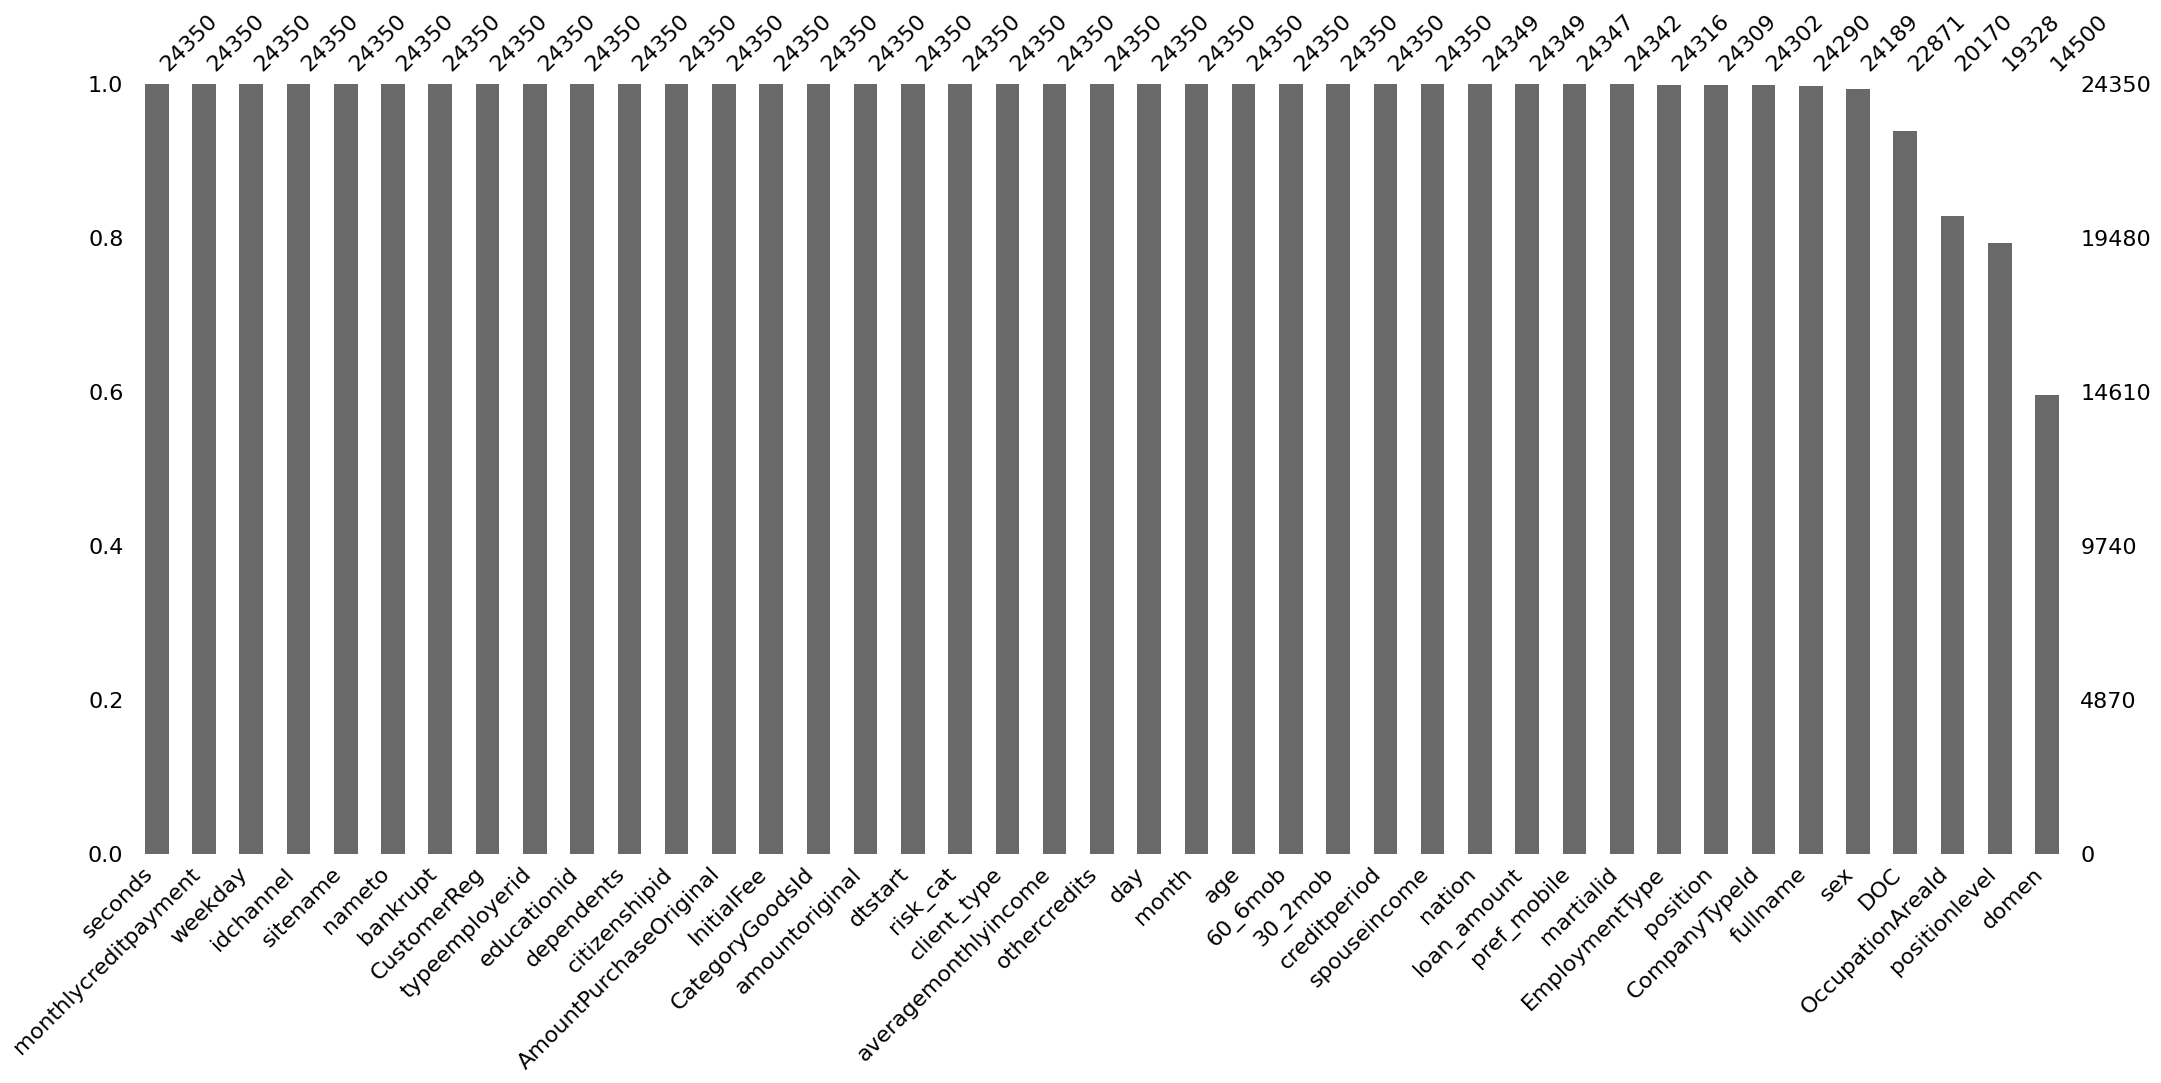

In [51]:
ax = msno.bar(origin, sort='descending')

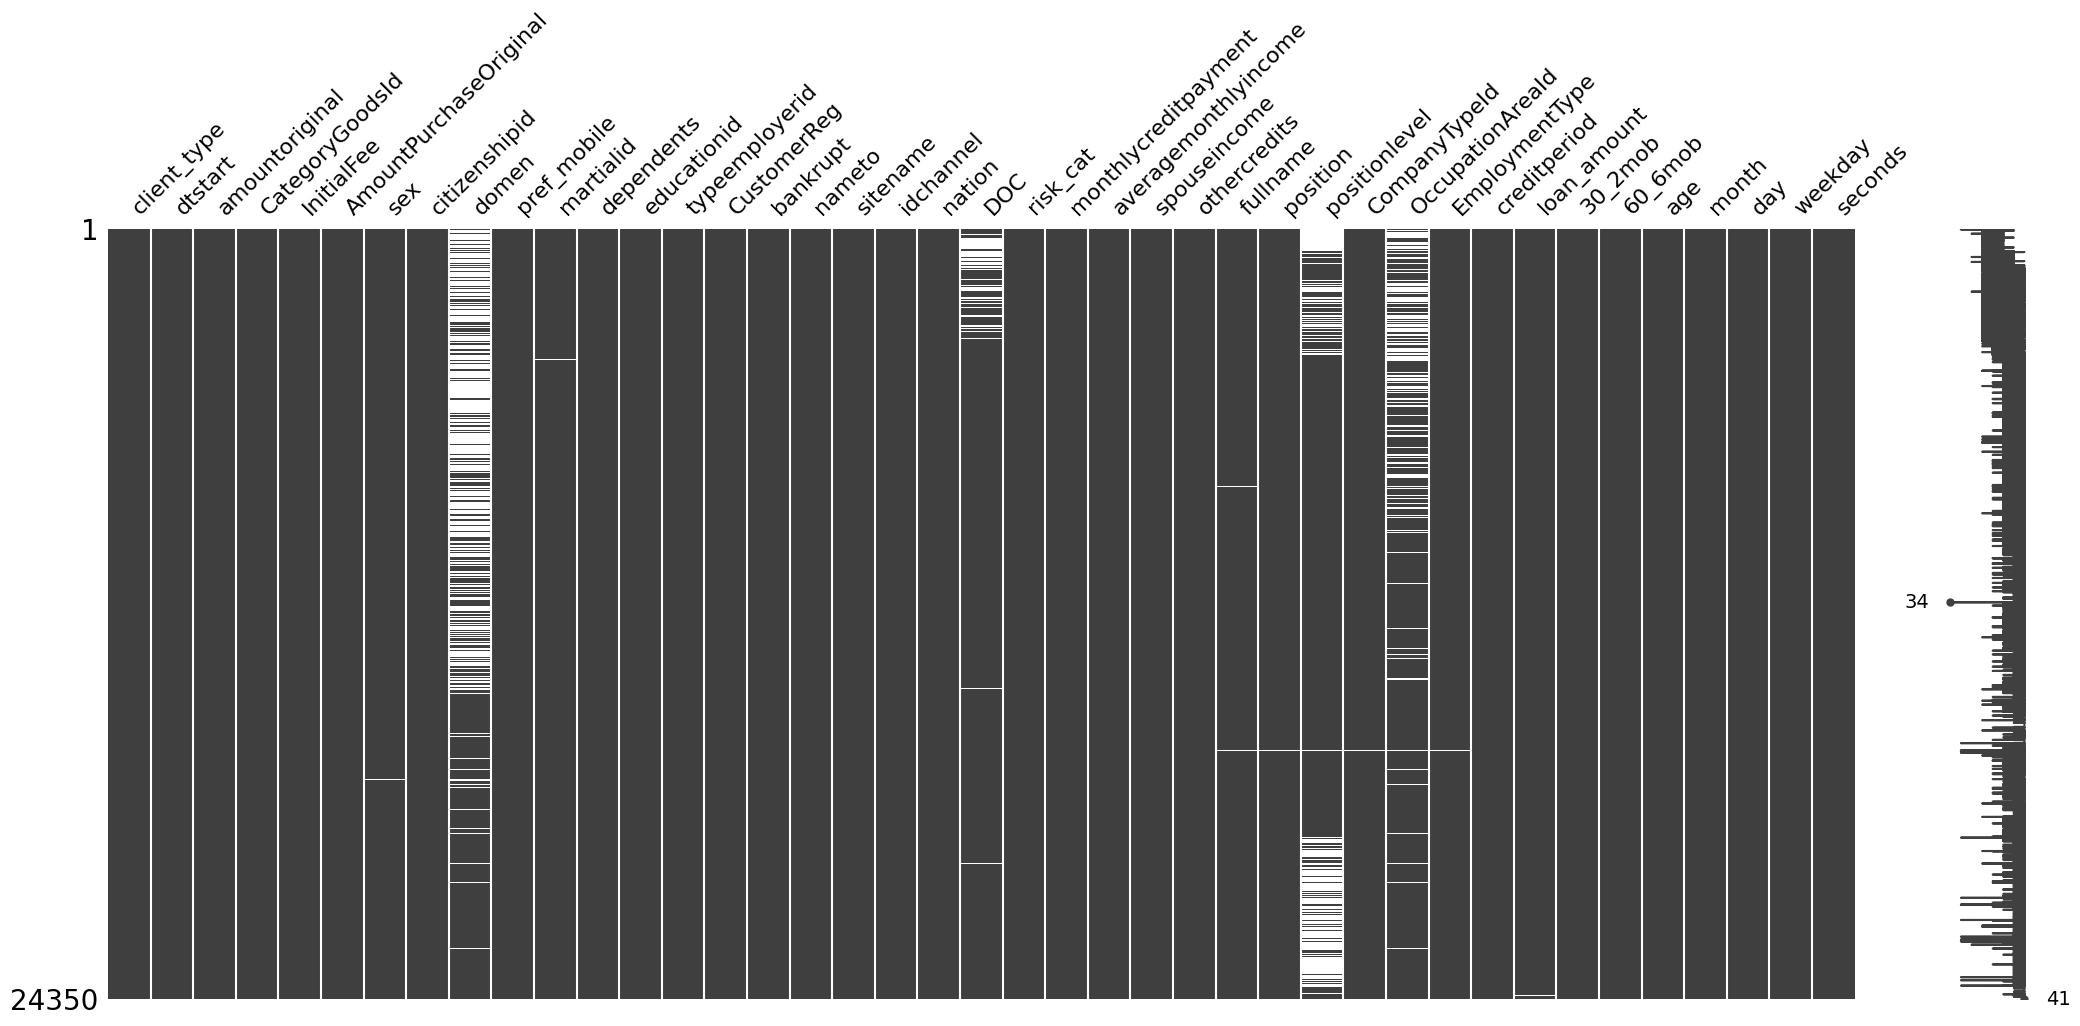

In [52]:
ax = msno.matrix(origin.sort_values('dtstart'))

## Анализ распределений

### `month`  - месяц подачи заявки

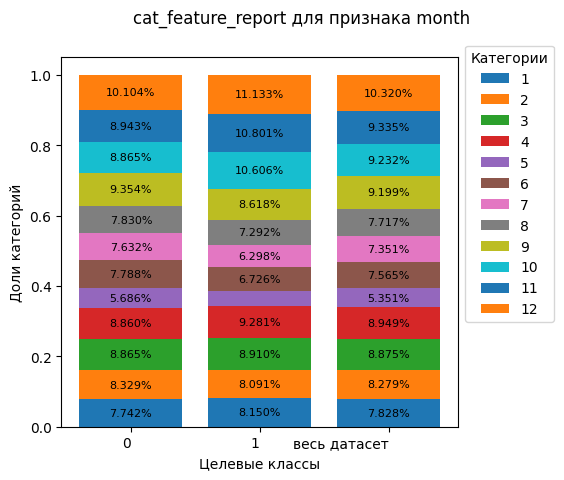

In [12]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='month', target_colname='60_6mob')

### `day` - день подачи заявки

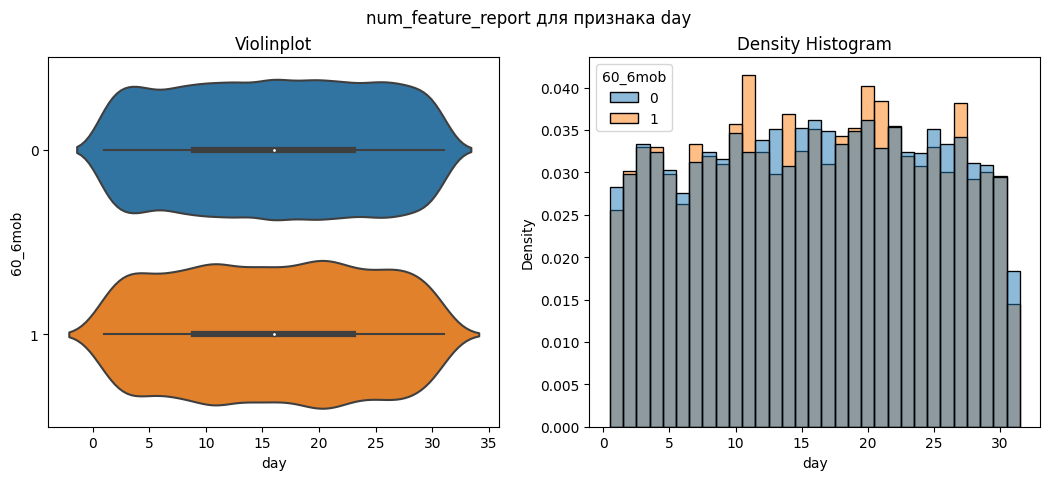

In [16]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='day',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### `weekday` - день недели подачи заявки

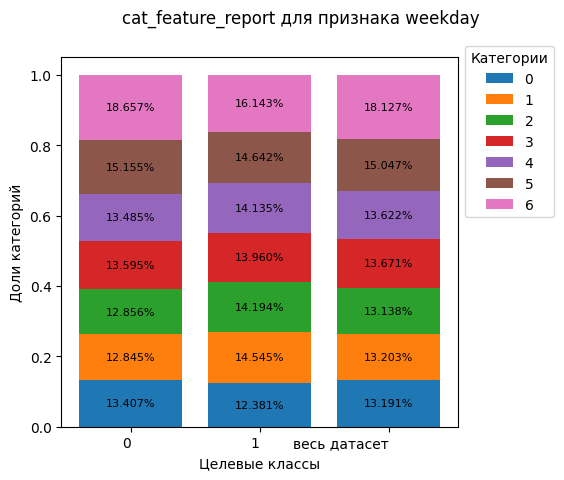

In [17]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='weekday', target_colname='60_6mob')

### `seconds` - 

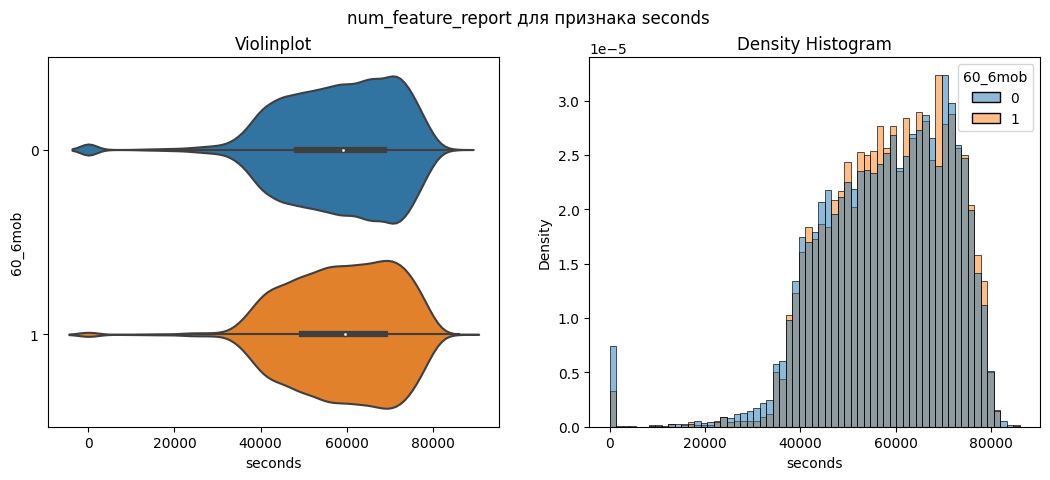

In [18]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='seconds',
    target_colname='60_6mob',
#     histplot_args={'discrete': True},
)

### `age` - возраст

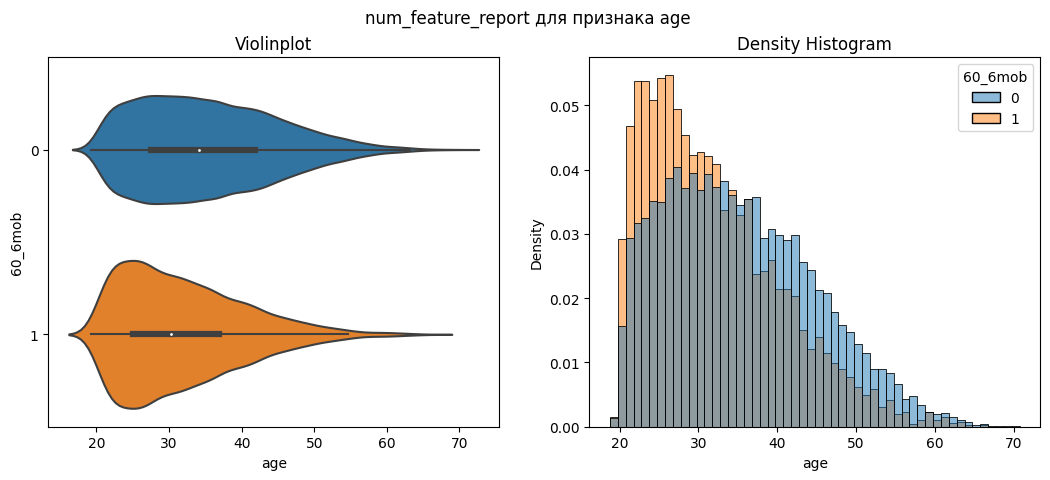

In [19]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='age',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### `sex` - пол

In [4]:
origin['sex'] = origin['sex'].replace(1002.0, np.nan)

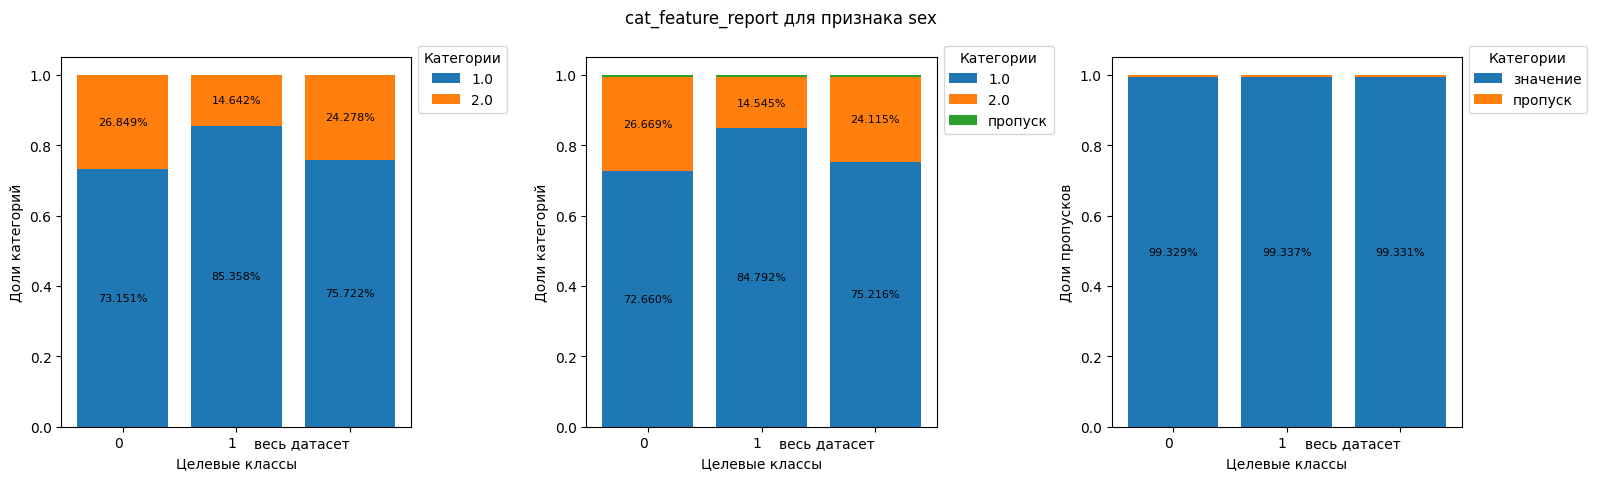

In [5]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='sex', target_colname='60_6mob')

### `martialid` - семейное положение

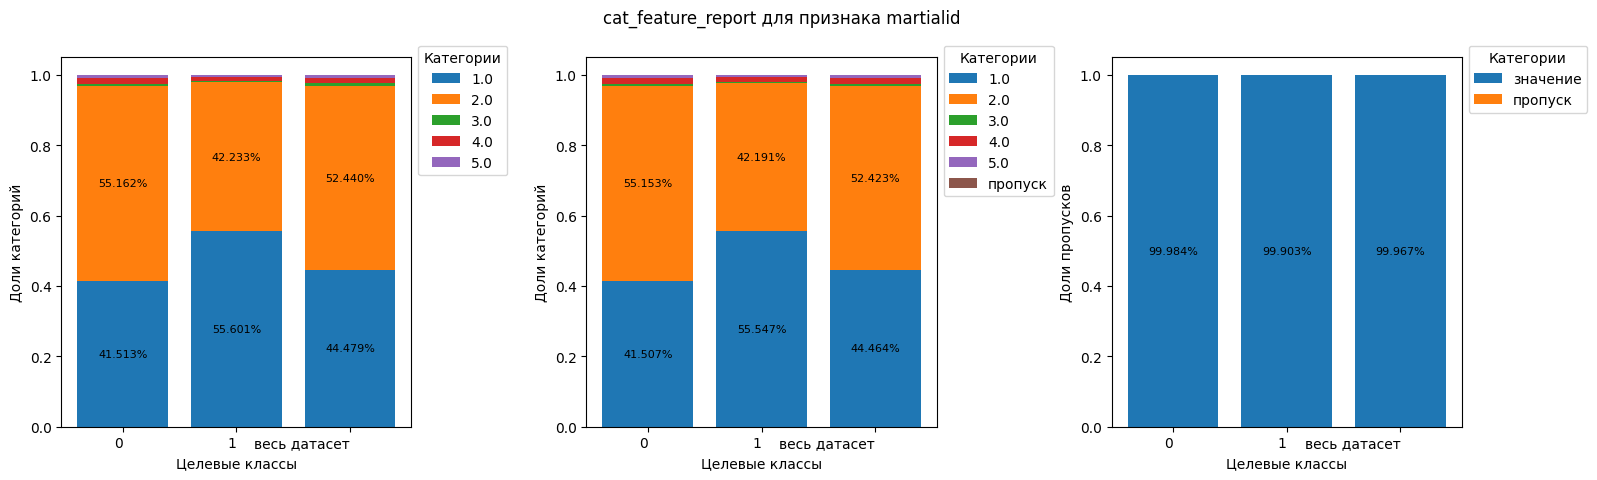

In [23]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='martialid', target_colname='60_6mob')

### `nation` - национальность

In [27]:
origin['nation'].isna().sum()

1

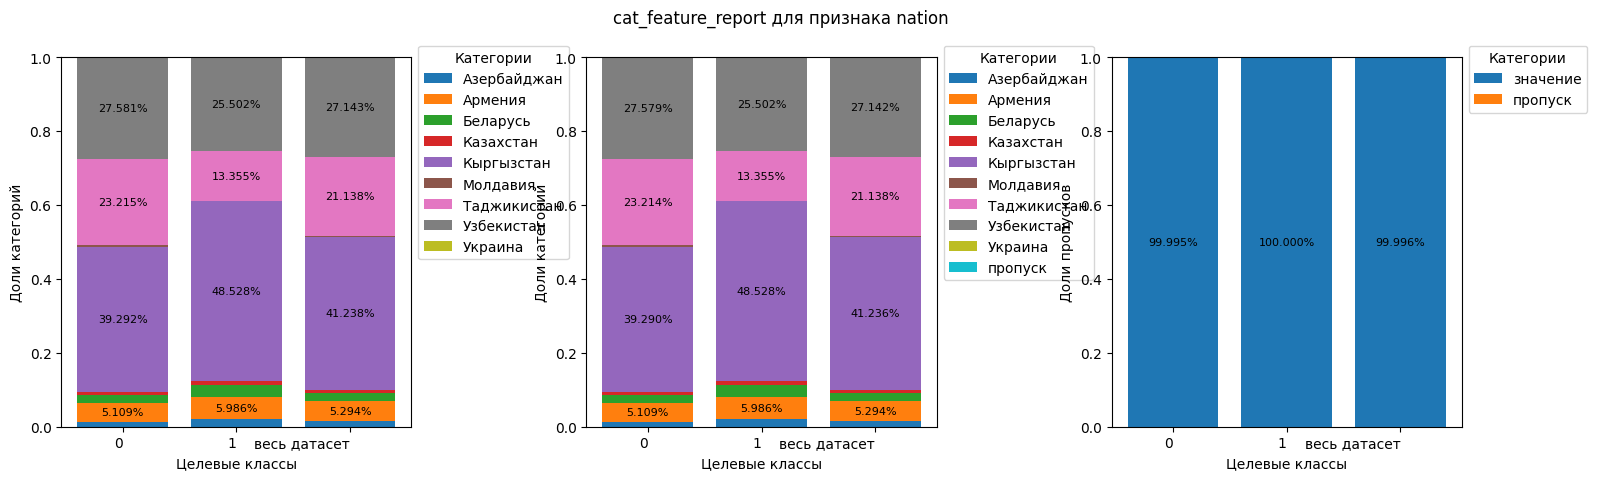

In [24]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='nation', target_colname='60_6mob')

In [54]:
# повторяет id, но с пропусками
origin = origin.drop(columns='nation')

### `citizenshipid` - id национальности

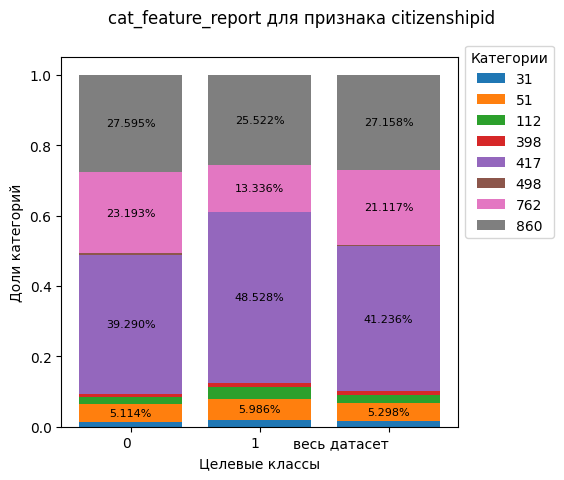

In [38]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='citizenshipid', target_colname='60_6mob')

In [29]:
nations = {
    'Кыргызстан': 417,
    'Узбекистан': 860,
    'Таджикистан': 762,
    'Армения': 51,
    'Беларусь': 112,
    'Азербайджан': 31,
    'Казахстан': 398,
    'Молдавия': 498
}

### `dependents` - число иждивенцев

In [40]:
origin['dependents'] = origin['dependents'].replace(33, 3)

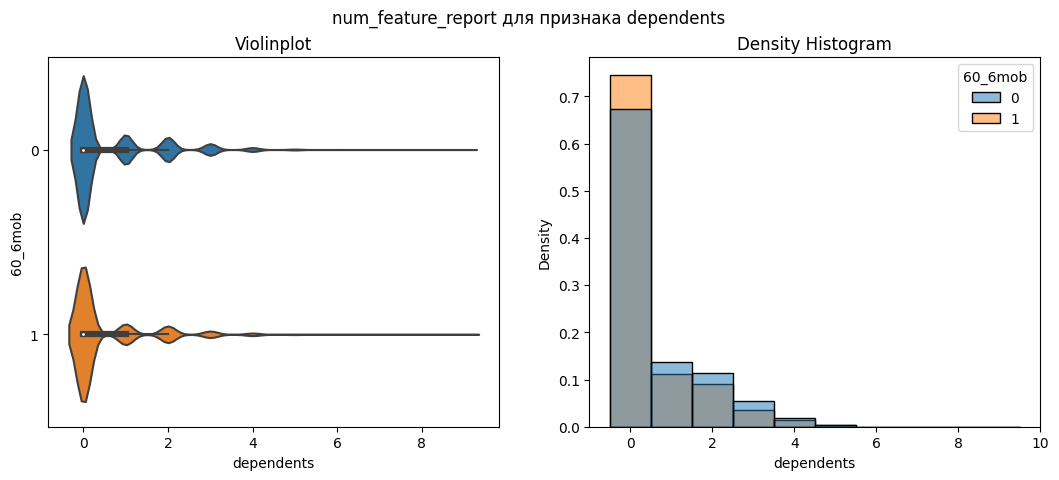

In [41]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='dependents',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### `averagemonthlyincome` - ежемесячный доход

In [42]:
# РАЗБИТЬ ПО БИНАМ

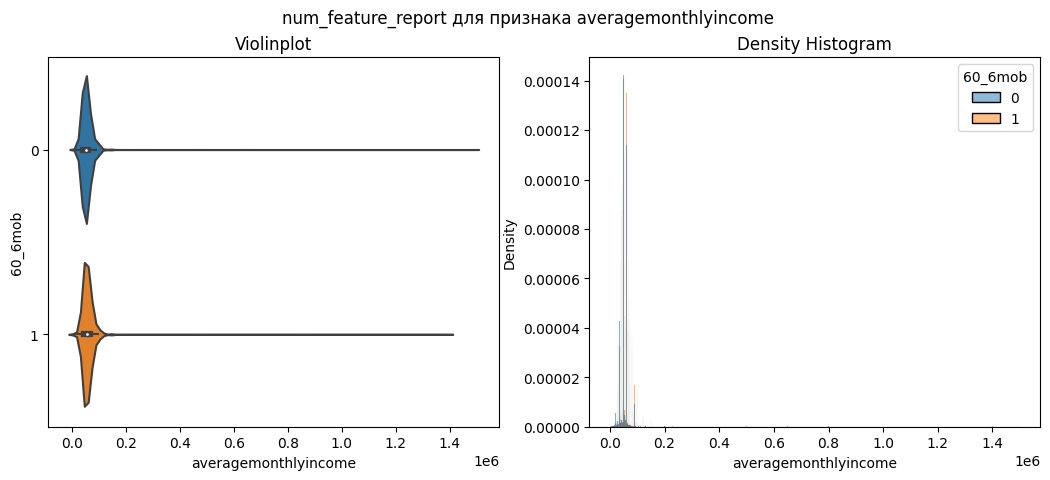

In [43]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='averagemonthlyincome',
    target_colname='60_6mob',
#     histplot_args={'discrete': True},
)

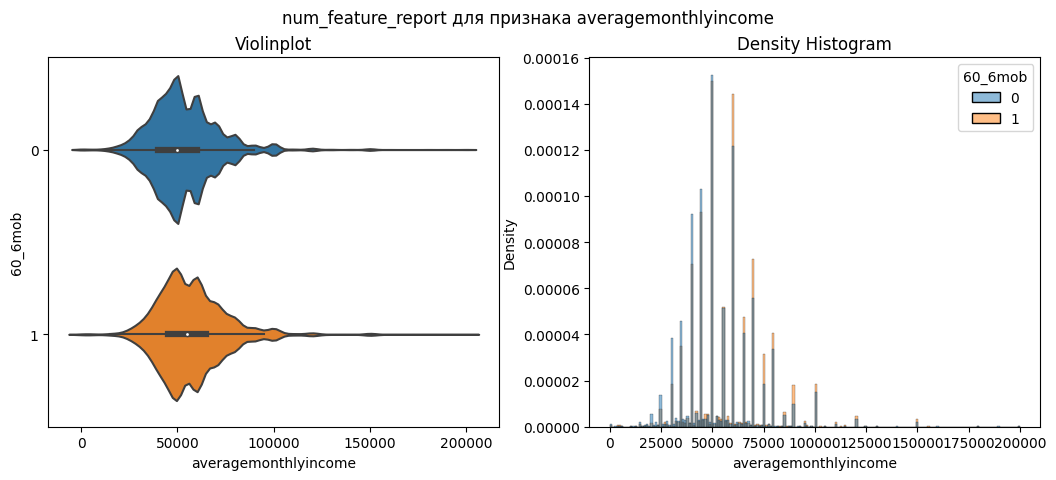

In [44]:
fig, axes = utils.eda.num_feature_report(
    origin.query('averagemonthlyincome <= 200_000'),
    feature_colname='averagemonthlyincome',
    target_colname='60_6mob',
    # histplot_args={'discrete': True},
)

### `spouseincome` - доход супруг(а/и)

In [45]:
origin['spouseincome'].value_counts()

spouseincome
0        24349
43200        1
Name: count, dtype: int64

In [55]:
origin = origin.drop(columns='spouseincome')  # константный признак

### `Loan amount` - выданная сумма первой запрошенной заявки по клиенту

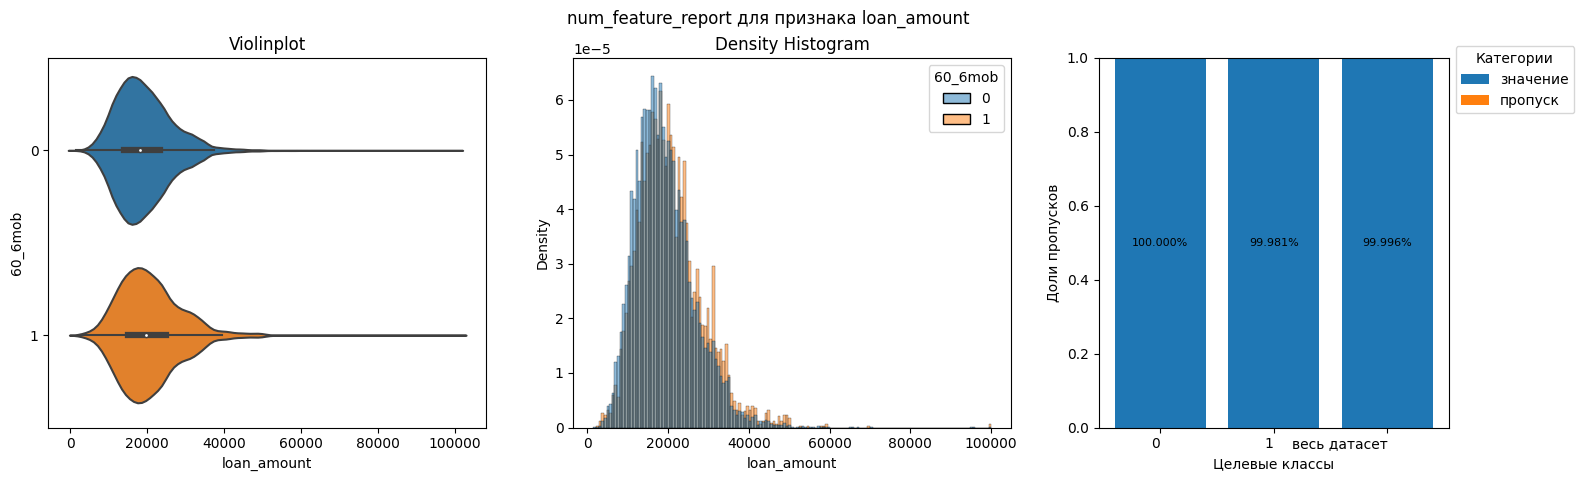

In [57]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='loan_amount',
    target_colname='60_6mob',
#     histplot_args={'discrete': True},
)

### `amountoriginal` - сумма займа

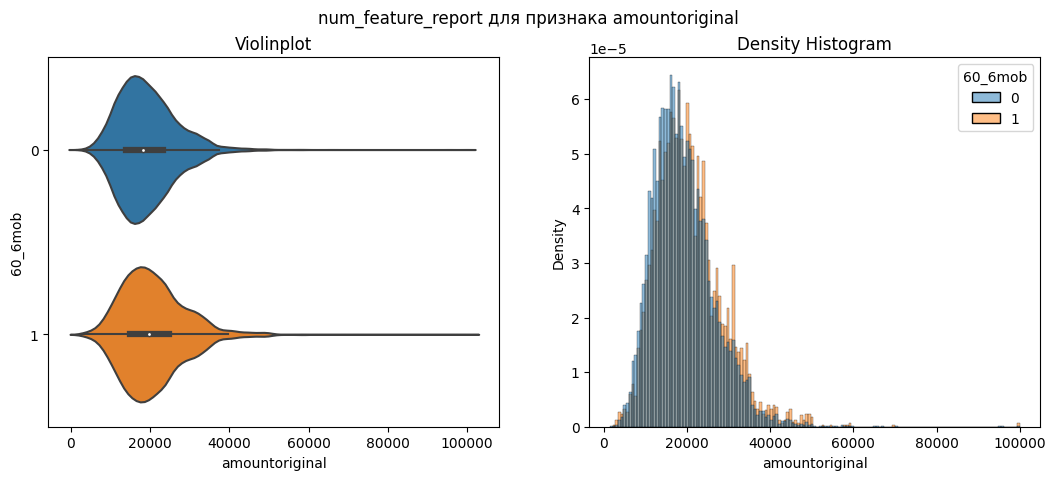

In [60]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='amountoriginal',
    target_colname='60_6mob',
#     histplot_args={'discrete': True},
)

In [62]:
(origin['amountoriginal'] - origin['loan_amount']).value_counts()

0         24346
-17566        1
-26620        1
-18604        1
Name: count, dtype: int64

In [63]:
origin = origin.drop(columns='amountoriginal')  # полностью повторияет `Loan amount`

### `InitialFee` - первоначальный взнос

In [131]:
origin[['InitialFee', 'Loan amount', 'interest_amount', '60_6mob']].sort_values('InitialFee', ascending=False).head(20)

,InitialFee,Loan amount,interest_amount,60_6mob
AppId,,,,
1725396,64560,43040,13428,0
2052789,50000,67388,47711,0
2001507,49894,49894,35325,0
1317106,48250,48250,26055,0
2033161,44321,58873,44508,0
1983919,38744,38744,27431,0
1868125,37232,37232,79234,0
1909165,36488,36488,36092,0
1363087,34245,34245,9246,0


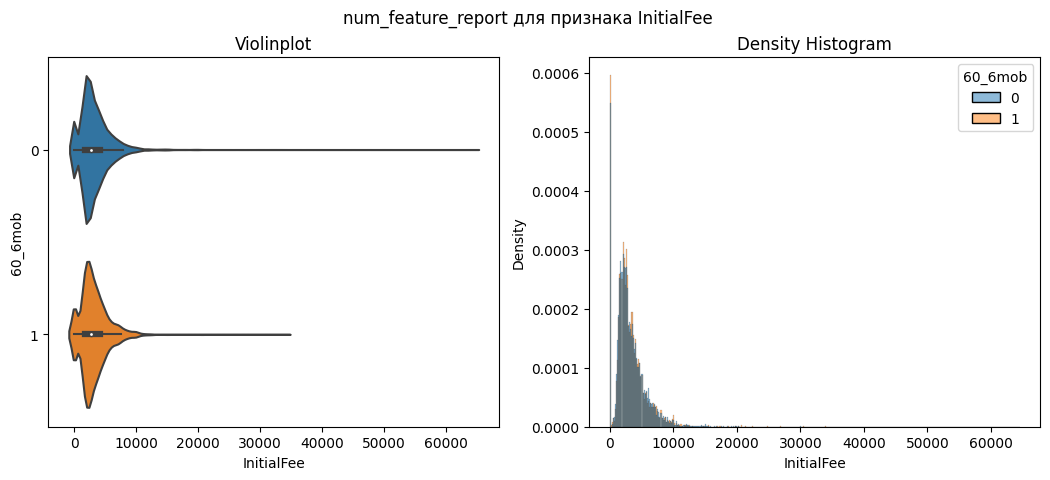

In [64]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='InitialFee',
    target_colname='60_6mob',
#     histplot_args={'discrete': True},
)

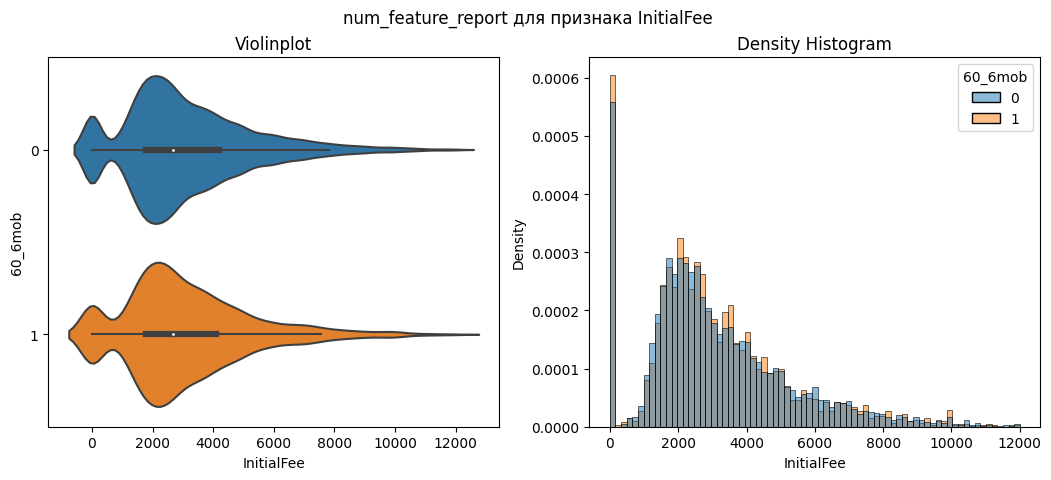

In [65]:
fig, axes = utils.eda.num_feature_report(
    origin.query('InitialFee <= 12_000'),
    feature_colname='InitialFee',
    target_colname='60_6mob',
#     histplot_args={'discrete': True},
)

In [132]:
origin['InitialFee'].describe()

count   24217
mean     3242
std      2591
min         0
25%      1788
50%      2696
75%      4198
max     64560
Name: InitialFee, dtype: float64

### `AmountPurchaseOriginal`  - запрошенная сумма

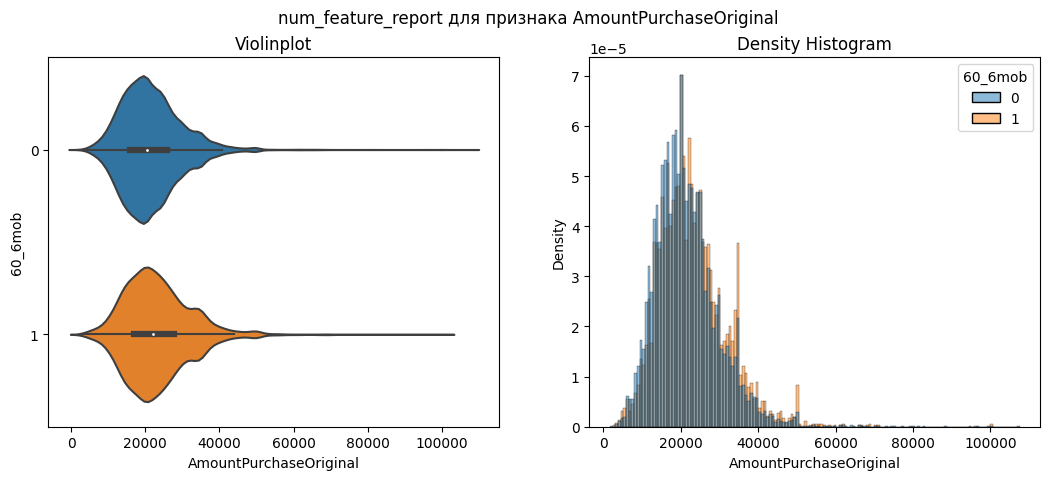

In [66]:
fig, axes = utils.eda.num_feature_report(
    origin,
    feature_colname='AmountPurchaseOriginal',
    target_colname='60_6mob',
#     histplot_args={'discrete': True},
)

In [68]:
(origin['AmountPurchaseOriginal'] - origin['loan_amount']).value_counts()

0       2151
1999      61
1399      61
1499      56
1199      53
        ... 
3105       1
2180       1
3123       1
3264       1
4946       1
Name: count, Length: 15027, dtype: int64

In [120]:
origin.drop(columns='AmountPurchaseOriginal', inplace=True)

### `othercredits` - наличие кредитов в других банках

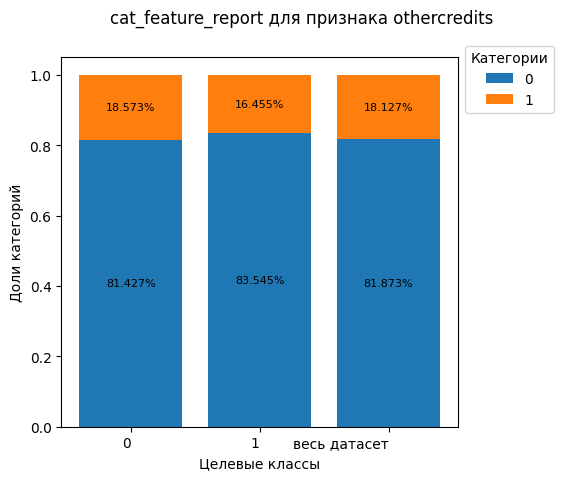

In [69]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='othercredits', target_colname='60_6mob')

### `fullname` - название организации

In [70]:
origin['fullname'].nunique()

17707

In [71]:
origin['fullname'].value_counts()[:10]

fullname
 ООО ЯНДЕКС.ТАКСИ       328
ООО ЯНДЕКС.ТАКСИ        214
ООО ЯНДЕКС.ЕДА          117
 ООО ЯНДЕКС.ЕДА         110
ООО ДЕЛИВЕРИ КЛАБ       100
 ООО ЯНДЕКС.ДОСТАВКА     77
 ООО ДЕЛИВЕРИ КЛАБ       75
 ООО АНТ ЯПЫ             61
ООО ЯНДЕКС               59
 ООО ЯНДЕКС              52
Name: count, dtype: int64

In [32]:
origin['fullname'] = origin['fullname'].fillna('пропуск')

In [37]:
origin = group_other(origin, 'fullname', 100)

In [38]:
origin['fullname'].nunique()

9

In [39]:
for i in origin['fullname'].value_counts().items():
    print(i)

('другое', 12596)
('стройка', 1814)
('ип', 1095)
('жилищник', 710)
('такси', 675)
('доставка', 626)
('супермаркет', 513)
('яндекс', 148)
('красное белое', 111)


### `position` - должность

In [72]:
origin['position'].nunique()

3049

In [73]:
origin['position'].value_counts()[:10]

position
 ВОДИТЕЛЬ             699
 СТРОИТЕЛЬ            676
ПОВАР                 648
 ПОВАР                630
ВОДИТЕЛЬ              504
УБОРЩИЦА              481
 ПОДСОБНЫЙ РАБОЧИЙ    436
 УБОРЩИЦА             421
 РАЗНОРАБОЧИЙ         404
 КУРЬЕР               391
Name: count, dtype: int64

In [143]:
origin['position'] = origin['position'].fillna('пропуск')

In [144]:
def foo_position(x):
    x = str(x).strip().lower()

    x = re.sub("\W+", " ", x)
    x = re.sub("\d+", "", x)

    if x in ["none", "null", "nan", "", " "]:
        x = "пропуск"

    return x

In [145]:
position_prepared = origin['position'].apply(foo_position)

### `positionlevel` - ?

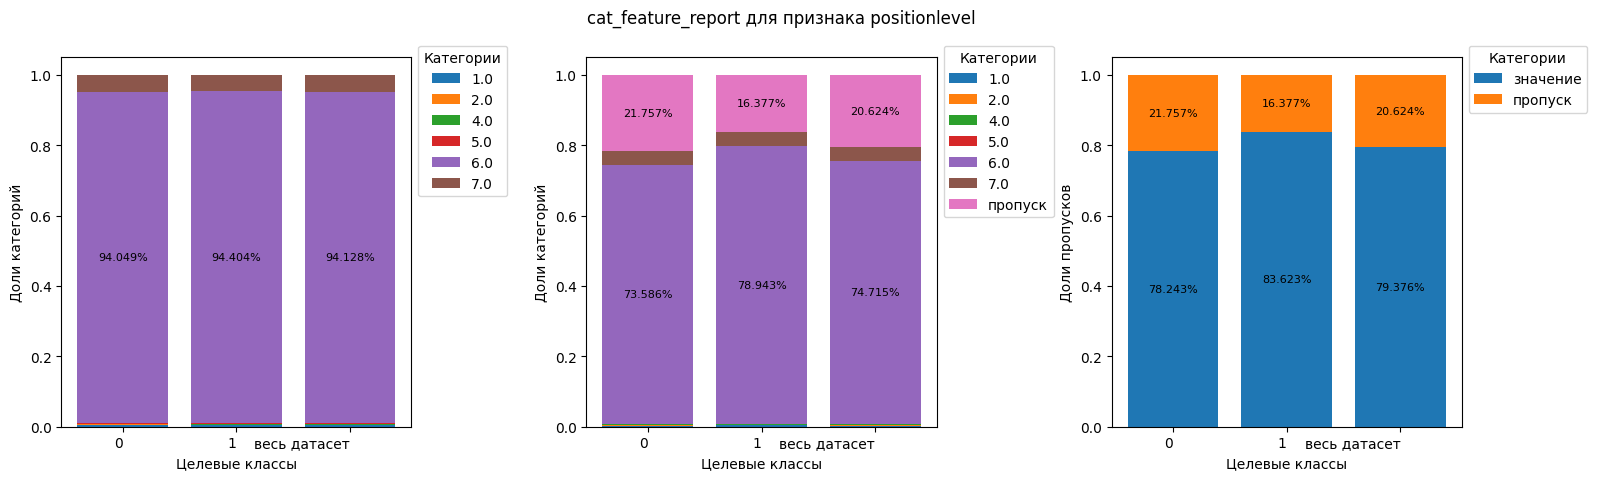

In [74]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='positionlevel', target_colname='60_6mob')

In [75]:
origin['positionlevel'].value_counts()

positionlevel
6    18193
7      934
1       82
5       40
2       40
4       39
Name: count, dtype: int64

### `CompanyTypeId` - ?

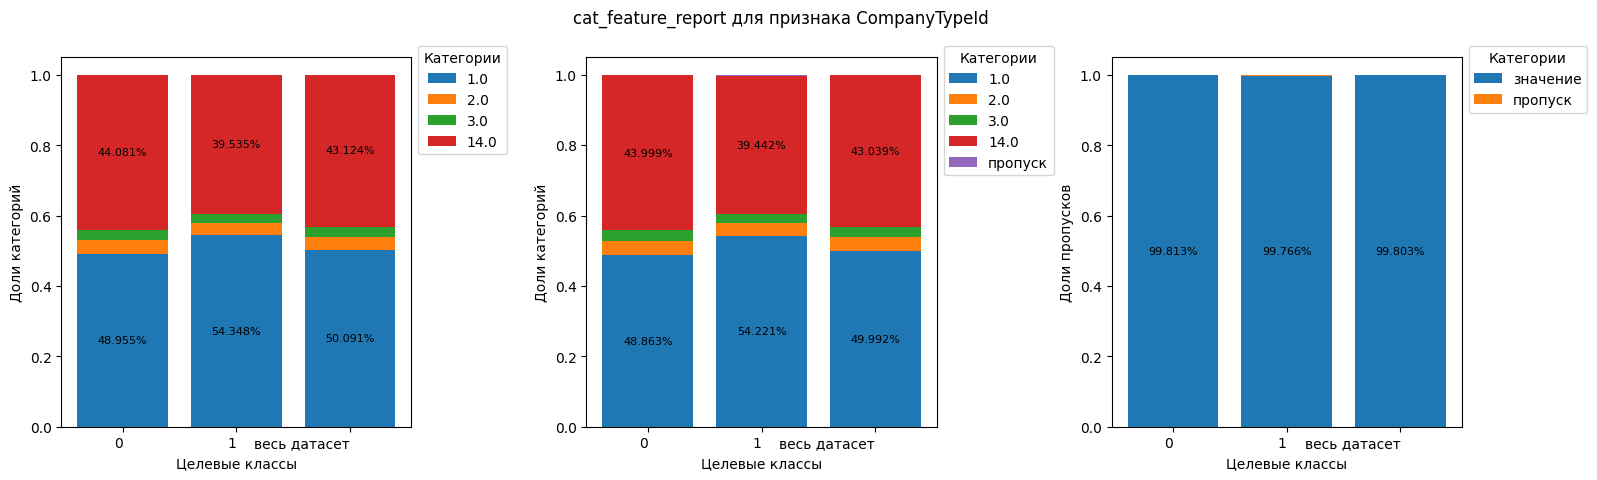

In [76]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='CompanyTypeId', target_colname='60_6mob')

In [77]:
origin['CompanyTypeId'].value_counts()

CompanyTypeId
1     12173
14    10480
2       956
3       693
Name: count, dtype: int64

### `OccupationAreaId` - ?

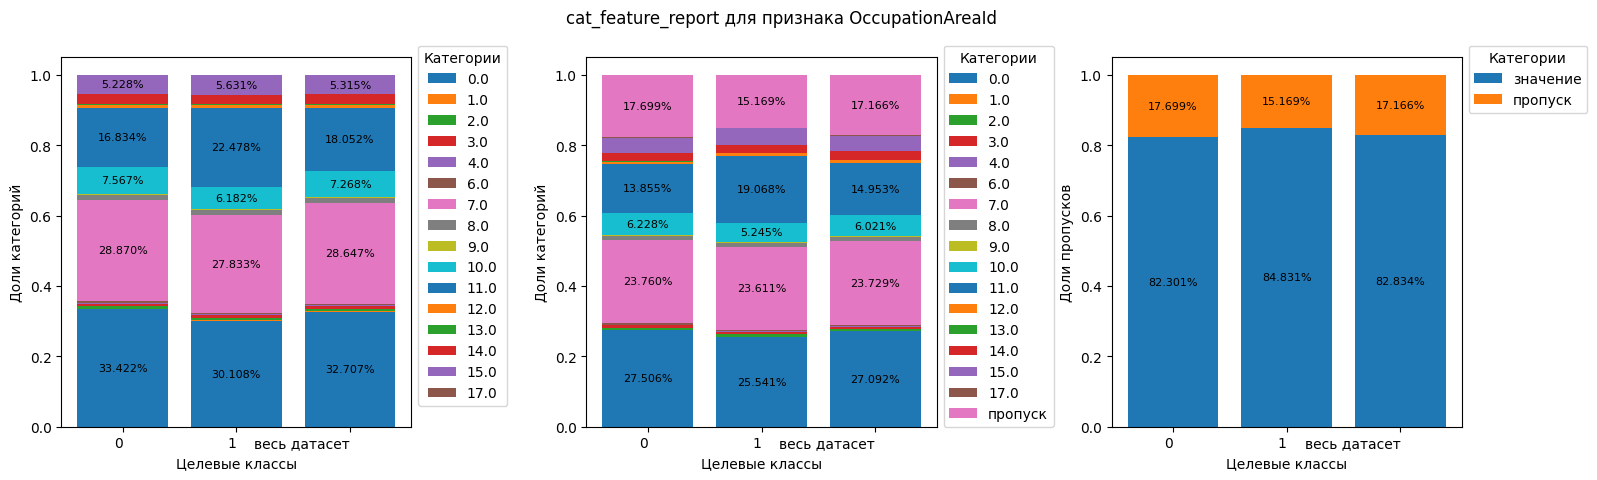

In [78]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='OccupationAreaId', target_colname='60_6mob')

### `EmploymentType` - ?

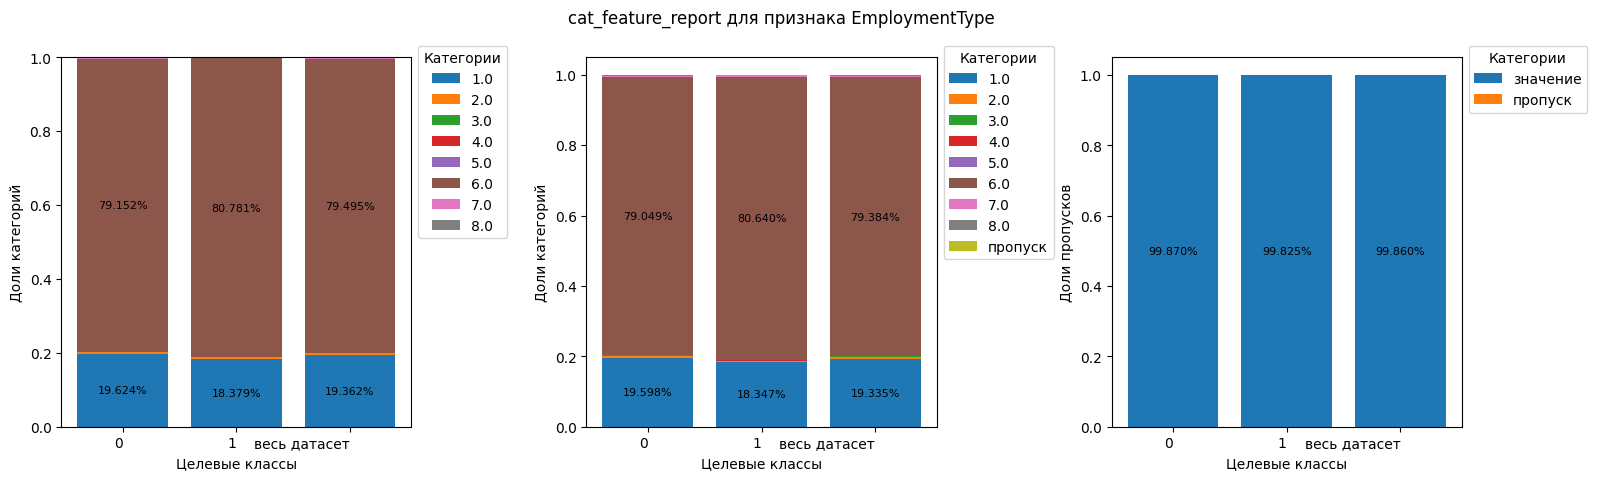

In [79]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='EmploymentType', target_colname='60_6mob')

In [80]:
origin['EmploymentType'].value_counts()

EmploymentType
6    19330
1     4708
2      144
7      100
8       22
3        7
4        3
5        2
Name: count, dtype: int64

### `CategoryGoodsId` - тип продукта

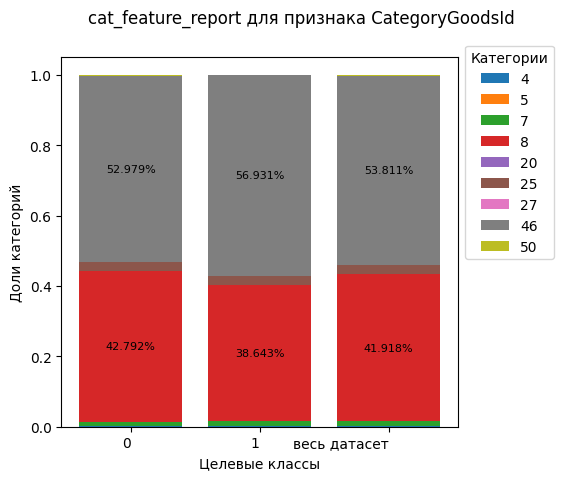

In [81]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='CategoryGoodsId', target_colname='60_6mob')

### `Creditperiod` - срок кредита плановый

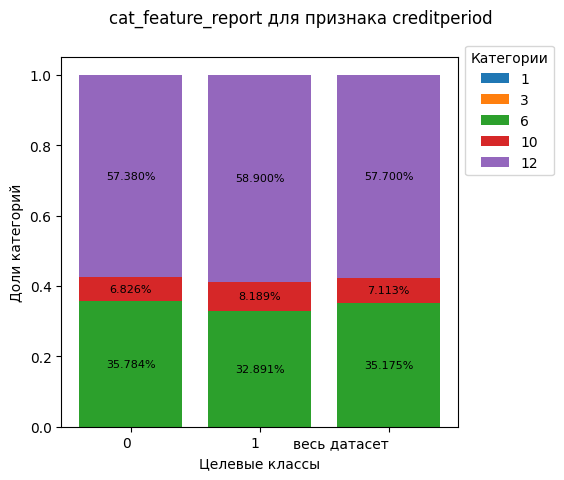

In [82]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='creditperiod', target_colname='60_6mob')

### `pref_mobile` - префикс номера телефона

In [83]:
origin['pref_mobile'].value_counts()

pref_mobile
7977    3740
7901    1531
7999    1460
7925    1385
7926    1138
        ... 
7939      15
7986      14
7933      13
7978       3
7934       1
Name: count, Length: 72, dtype: int64

In [84]:
origin.drop(columns=['pref_mobile'], inplace=True)

### `domen` - почтовый адрес

In [85]:
origin['domen'].isna().sum()

9850

In [86]:
origin['domen'].nunique()

299

In [87]:
origin['domen'].value_counts()

domen
gmail.com          4600
mail.ru            3507
 null              2728
MAIL.RU             565
GMAIL.COM           285
                   ... 
gmail.xom             1
mf-partner.ru         1
152355gmail.com       1
icoud.com             1
Yandex.ru             1
Name: count, Length: 299, dtype: int64

In [176]:
def foo_mail_domain(x):
    x = str(x)
    x = x.strip()
    x = x.lower()
    x = x.split('.')[0]

    return x

In [178]:
origin['domen'] = origin['domen'].apply(foo_mail_domain)

In [179]:
origin['domen'].nunique()

204

In [75]:
POPULAR_LIST = [
    # 'nan', 
    'gmail', 
    'mail',
    'bk',
    'maximus',
    'yandex',
    'interc',
    'gk-prime',
    'list',
    'riteiler',
    'icloud',
    'net',
    'inbox',
    'ya',
    'interantenna',
    'mob-reshenie',
    'unionshops',
    'petro-park',
    'ukplus',
    'scat-mobile',
    'rambler',
    'megafon',
    'vk',
    't2retail',
    'diler-centr',
    't2distrib',
    'ural-retail',
    'westtelecom',
    'mega',
    # 'internet',
    # 'simkamsk',
    # 'live',
    'mob-mir',
    # 'example',
    # 'test',
    'cor-all',
    'retail',
    'vse-svoi',
    'monobrend',
    'tele2',
    'organicreligion',
    'telebox',
    'mf-partner',
]

In [76]:
origin['mail_domain_errors'] = origin['mail_domain'].replace('nan', np.nan)
origin.loc[origin['mail_domain_errors'].notna(), 'mail_domain_errors'] = origin['mail_domain_errors'].map(lambda x: 0 if x in POPULAR_LIST else 1)

In [77]:
appended_data = pd.DataFrame()
for i in POPULAR_LIST:
    data = pd.DataFrame(origin['mail_domain'].apply(lambda x: distance(x, i))).rename(columns={'mail_domain': i})
    appended_data = pd.concat([appended_data, data], axis=1)

In [78]:
appended_data['mail_domain'] = origin['mail_domain']

In [79]:
appended_data

,gmail,mail,bk,maximus,yandex,interc,gk-prime,list,riteiler,icloud,net,inbox,ya,interantenna,mob-reshenie,unionshops,petro-park,ukplus,scat-mobile,rambler,megafon,vk,t2retail,diler-centr,t2distrib,ural-retail,westtelecom,mega,mob-mir,cor-all,retail,vse-svoi,monobrend,tele2,organicreligion,telebox,mf-partner,mail_domain
AppId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
637036,4,3,3,6,4,5,8,4,8,6,2,4,2,9,11,8,9,6,10,6,5,3,7,10,9,10,11,4,7,6,5,8,7,5,13,7,8,nan
662020,4,3,3,6,4,5,8,4,8,6,2,4,2,9,11,8,9,6,10,6,5,3,7,10,9,10,11,4,7,6,5,8,7,5,13,7,8,nan
682531,0,1,5,5,6,6,6,5,6,6,5,5,4,11,11,10,9,6,8,6,6,5,5,11,8,8,10,4,6,5,3,8,9,5,12,7,9,gmail
686663,4,3,3,6,4,5,8,4,8,6,2,4,2,9,11,8,9,6,10,6,5,3,7,10,9,10,11,4,7,6,5,8,7,5,13,7,8,nan
695736,4,3,3,6,4,5,8,4,8,6,2,4,2,9,11,8,9,6,10,6,5,3,7,10,9,10,11,4,7,6,5,8,7,5,13,7,8,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778123,0,1,5,5,6,6,6,5,6,6,5,5,4,11,11,10,9,6,8,6,6,5,5,11,8,8,10,4,6,5,3,8,9,5,12,7,9,gmail
1778206,1,0,4,4,5,6,7,4,6,6,4,5,3,11,10,9,9,5,8,5,5,4,5,10,8,8,10,3,5,5,3,8,8,5,12,7,8,mail
1778888,0,1,5,5,6,6,6,5,6,6,5,5,4,11,11,10,9,6,8,6,6,5,5,11,8,8,10,4,6,5,3,8,9,5,12,7,9,gmail


In [80]:
my_res = {}
for col in POPULAR_LIST:
    my_sim_lst = []
    for idx in appended_data.index:
        if appended_data[col][idx] <= 3:
            my_sim_lst.append(appended_data['mail_domain'][idx])
    my_sim_set = set(my_sim_lst)
    my_res[col] = my_sim_set

In [81]:
my_res

{'gmail': {'009mail',
  '0gmail',
  '123mail',
  '29mail',
  '508gmail',
  '616gmail',
  '658gmail',
  '6gmail',
  '88mail',
  '9gmail',
  'cmail',
  'dmail',
  'email',
  'emil',
  'gail',
  'gameil',
  'gami',
  'gamil',
  'gemail',
  'gimail',
  'gimal',
  'gma',
  'gmael',
  'gmai',
  'gmaii',
  'gmaiil',
  'gmail',
  'gmailc',
  'gmaill',
  'gmal',
  'gmali',
  'gmaul',
  'gmeil',
  'gmil',
  'gmill',
  'gmsil',
  'gnail',
  'imail',
  'iuogmail',
  'jmail',
  'jmali',
  'ma',
  'mai',
  'maik',
  'mail',
  'maile',
  'mailru',
  'mal',
  'mali',
  'maul',
  'mil',
  'nail',
  'qmail',
  'retail'},
 'mail': {'009mail',
  '0gmail',
  '123mail',
  '29mail',
  '6gmail',
  '88mail',
  '9gmail',
  'aaa',
  'az',
  'azia',
  'baibol',
  'bl',
  'cmail',
  'dmail',
  'email',
  'emil',
  'gail',
  'gameil',
  'gami',
  'gamil',
  'gemail',
  'gimail',
  'gimal',
  'gma',
  'gmael',
  'gmai',
  'gmaii',
  'gmaiil',
  'gmail',
  'gmailc',
  'gmaill',
  'gmal',
  'gmali',
  'gmaul',
  'gmei

In [82]:
domain_dict = {
    'nan': 'nan',
    'gmail': [
        '0gmail',
        '508gmail',
        '616gmail',
        '658gmail',
        '6gmail',
        '9gmail',
        'cmail',
        'dmail',
        'gail',
        'gameil',
        'gami',
        'gamil',
        'gemail',
        'gimail',
        'gimal',
        'gma',
        'gmael',
        'gmai',
        'gmaii',
        'gmaiil',
        'gmail',
        'gmailc',
        'gmaill',
        'gmal',
        'gmali',
        'gmaul',
        'gmeil',
        'gmil',
        'gmill',
        'gmsil',
        'gnail',
        'iuogmail',
        'jmail',
        'jmali',
        'qmail',
    ],
    'mail': [
        '0gmail',
        '123mail',
        '29mail',
        '88mail',
        'email',
        'emil',
        'imail',
        'ma',
        'mai',
        'maik',
        'mail',
        'maile',
        'mailru',
        'mal',
        'mali',
        'maul',
        'mil',
        'nail',
    ],
    'bk': [
        '17bk',
        '95bk',
    ],
    'maximus': [
        'maxsimus',
        'naximus',
    ],
    'yandex': [
        'ayndex', 
        'yanex',
    ],
    'interc': 'interc',
    'gk-prime': 'pk-prime',
    'list': 'list',    
    'riteiler': [
        'rileiler',
        'riteile',
    ],
    'icloud': [
        'icloub',
        'iclout',
        'iclud',
        'icoud',
    ],
    'net': [
        'neet',
        'netu',
    ],
    'inbox': 'inbo',
    'ya': 'ya',
    'interantenna': 'interantenna',
    'mob-reshenie': 'mobreshenie',
    'unionshops': 'unionashops',
    'petro-park': 'petropark',
    'ukplus': 'ukplus',
    'scat-mobile': 'scat-mobile',
    'rambler': 'rambler',
    'megafon': 'megafon',
    'vk': 'vk',
    't2retail': 't2retail',
    't2distrib': 't2distrib',
    'ural-retail': 'ural-retail',
    'westtelecom': 'westtelecom',
    'diler-centr': 'diler-centr',
    'mega': 'mega',
#     'internet': 'internet',
#     'simkamsk': 'simkamsk',
#     'live': 'live',
    'mob-mir': 'mob-mir',
#     'example': 'example',
#     'test': 'test',
    'cor-all': 'cor-all',
    'retail': 'retail',
    'vse-svoi': 'vse-svoi',
    'monobrend': 'monobrend',
    'tele2': 'tele2',
    'organicreligion': 'organicreligion',
    'telebox': 'telebox',
    'mf-partner': 'mf-partner',
}

In [83]:
for idx in origin['mail_domain'].index:
    for key, values in domain_dict.items():
        if origin.loc[idx, 'mail_domain'] in values:
            origin.loc[idx, 'mail_domain'] = key

In [84]:
for idx in origin['mail_domain'].index:
    if origin.loc[idx, 'mail_domain'] not in domain_dict.keys():
        origin.loc[idx, 'mail_domain'] = 'undefined'

In [85]:
group = [
    'scat-mobile', 
    'megafon',
    'cor-all', 
    'monobrend',
    'rambler',
    't2distrib',
    'diler-centr',
    'mob-mir',
    'westtelecom',
    'ural-retail',
    'mf-partner',
    'organicreligion',
    'vk',
    'telebox',
    'tele2',
    'vse-svoi',
    'ukplus',
    'petro-park',
    'unionshops',
    'mob-reshenie',
    'interantenna',
]

In [86]:
for idx in origin['mail_domain'].index:
    for i in group:
        if origin.loc[idx, 'mail_domain'] in group:
            origin.loc[idx, 'mail_domain'] = 'small_sample'

In [87]:
origin['mail_domain'] = origin['mail_domain'].replace('nan', np.nan)

In [88]:
origin['mail_domain'].value_counts()

gmail           3939
mail            3023
bk               230
maximus          211
yandex           205
small_sample     191
interc            94
gk-prime          91
icloud            88
riteiler          86
list              85
net               83
undefined         77
inbox             66
t2retail          57
ya                50
Name: mail_domain, dtype: int64

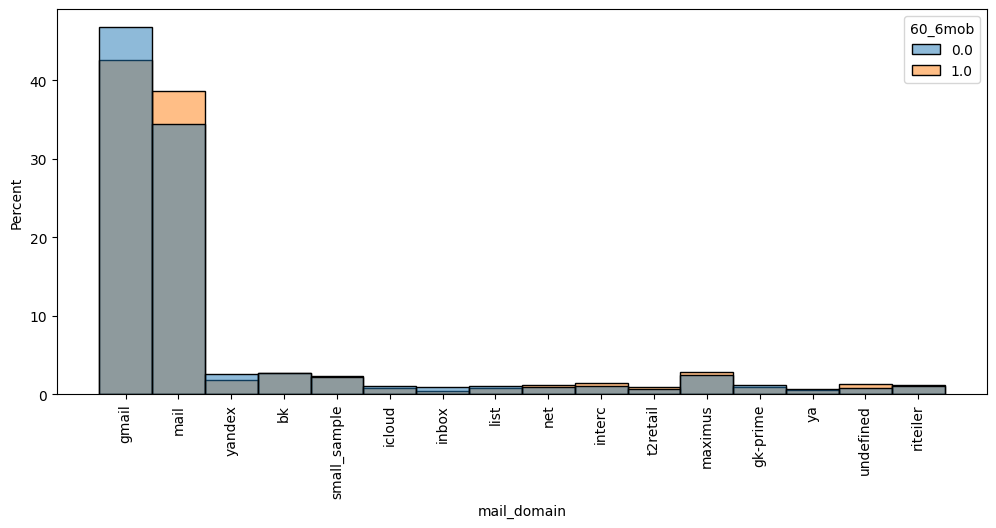

In [89]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=origin, x='mail_domain', hue='60_6mob', stat='percent', discrete=True, common_norm=False, ax=ax)
for i in ax.get_xticklabels():
    i.set_rotation(90)
plt.show()

### `typeemployerid` - id типа работы

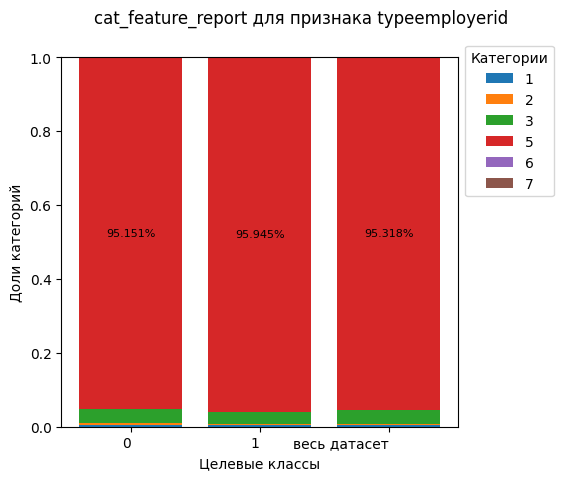

In [89]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='typeemployerid', target_colname='60_6mob')

### `CustomerReg` - id из организации

In [91]:
origin['CustomerReg'].nunique()

376

In [92]:
origin['CustomerReg'].value_counts()[:20]

CustomerReg
26324    4572
36302    2486
38526    1111
44570     945
28836     804
28589     759
28464     738
36326     715
40798     652
28203     560
37924     489
43010     488
37300     443
12840     395
41364     355
28567     352
30322     346
41159     318
29698     305
28465     301
Name: count, dtype: int64

## `nameto` - торговая точка

In [5]:
origin['nameto'].nunique()

244

In [24]:
origin['nameto'].value_counts()[:20]

nameto
ПАО Вымпел-Коммуникации    4586
ООО Ритейлер               2667
ООО Кредит Консалтинг      1956
АО РТК                     1206
ООО "БЕСТСЕЛЛЕР-ЦЕНТР"      843
ООО ММБ                     835
ООО Сити Ритейл             784
ООО ЮНИОН                   779
ООО МОБИЛЬНОЕ РЕШЕНИЕ       762
ООО ТРЕЙДАЛЬЯНС             753
ООО РИТЕЙЛ МР               643
ООО ЭЛЬБРУС                 641
ООО РОЗНИЧНАЯ СЕТЬ          486
ООО ВЕСТ ТЕЛЕКОМ            465
ООО Заря                    431
ООО Петропарк               372
ООО ТЕРРИТОРИЯ СВЯЗИ        348
ООО Арктида                 319
ООО КОРАЛЛ                  318
ООО Триумф Ритейл           315
Name: count, dtype: int64

In [25]:
def nameto_foo(x):
    x = x.lower()

    if x.startswith('ооо'):
        x = x.replace('ооо', '')
    elif x.startswith('ао'):
        x = x.replace('ао', '')
    elif x.startswith('зао'):
        x = x.replace('зао', '')
    elif x.startswith('оао'):
        x = x.replace('оао', '')
    elif x.startswith('пао'):
        x = x.replace('пао', '')
    elif x.startswith('ип'):
        x = 'ип'

    x = re.sub('\W+', ' ', x)
    x = x.strip()

    return x

In [34]:
origin['nameto']= origin['nameto'].apply(nameto_foo)

In [47]:
def func(data, x, num):

    small_list = []
    for k,v in data[x].value_counts().items():
        if v <= num:
            small_list.append(v)
    
    for i in data[x]:
        if i in small_list:
            i = мало

    return data[x]

In [48]:
func(origin, 'nameto', 100)

AppId
888776     вымпел коммуникации
890354     вымпел коммуникации
890401                    заря
890489     вымпел коммуникации
891426                    заря
                  ...         
1909623                    ртк
1910119                     ип
1912165       гарантия ритейла
1912368            трейдальянс
1912560              петропарк
Name: nameto, Length: 24350, dtype: object

In [38]:
origin['nameto'].value_counts()

nameto
вымпел коммуникации    4586
ритейлер               2667
кредит консалтинг      1956
ип                     1378
ртк                    1206
                       ... 
ритейл                    1
и связь центр             1
смс                       1
сдк трейдинг              1
рега                      1
Name: count, Length: 135, dtype: int64

In [99]:
for i in origin['nameto'].value_counts().items():
    print(i)

('ритейлер', 2557)
('кредит консалтинг', 1739)
('вымпел коммуникации', 1486)
('ип', 1154)
('ртк', 1089)
('сити ритейл', 758)
('юнион', 751)
('мобильное решение', 749)
('бестселлер центр', 717)
('ритейл мр', 643)
('трейдальянс', 638)
('эльбрус', 548)
('заря', 445)
('розничная сеть', 397)
('вест телеком', 394)
('петропарк', 299)
('триумф ритейл', 285)
('коралл', 284)
('территория связи', 267)
('мобильный город', 257)
('ммб', 244)
('арктида', 212)
('новатрейд', 210)
('рус аудит финанс', 162)
('стрела', 149)
('ук плюс', 149)
('луч', 140)
('телеком', 137)
('люкс телеком', 136)
('дилер', 116)
('комфорт телеком', 114)
('нева', 101)
('коннект групп', 86)
('мобильный город нск', 82)
('мегафон', 63)
('партнер та', 49)
('гарантия ритейла', 47)
('агентство связи', 44)
('мостелеко', 43)
('фаворит', 36)
('армада', 33)
('эра людей', 27)
('петро квест', 25)
('синергия', 24)
('магнит с', 21)
('город 174', 21)
('техпром', 18)
('цифровой папа', 16)
('новая связь', 15)
('орион спб', 15)
('к мобайл', 15)
(

In [100]:
group_nameto = [
#     'партнер та',
#     'гарантия ритейла',
#     'агентство связи',
#     'мостелеко',
#     'фаворит',
#     'армада',
#     'эра людей',
#     'петро квест',
#     'синергия',
#     'магнит с',
#     'город 174',
#     'техпром',
#     'цифровой папа',
#     'новая связь',
#     'орион спб',
#     'к мобайл', 
#     'стройремонтсервис',
#     'рд групп',
#     'яртелеком',
#     'латте',
    'квадрат',
    'сотакомплюс',
    'правда',
    'мегаполис',
    'мобильный ритейл',
    'ритейл юг',
    'тренд телеком',
    'а маркет',
    'сфера обслуживания',
    'займ',
    'коннект',
    'принцип',
    'профит',
    'мобайл групп',
    'ритм',
    'технологии связи',
    'кредит консалтинг плюс',
    'розница нн',
    'медиа софт',
    'техноком',
    'мвм', 
    'смг', 
    'абонент т',
    'т2мб',
    'пламя',
    'моно',
    'т связь', 
    'мегастрой',
    'тринити',
    'лс мобайл',
    'импульс',
    'эльдорадо',
    'норд',
    'креатор',
    'алло',
    'инфо связь',
    'смарт ритейл',
    '74 регион',
    'домотехника',
    'элегия запад',
    'двт',
    'прима трейд',
    'мобилком',
    'и связь центр',
    'регион инвест',
    'миратекс восток',
    'новая сила',
    'м бит',
    'добрые медиа',
    'ритейл',
    'смс',
    'сфера р',
    'сдк трейдинг',
    'мобильные технологии',
    'контакт',
    'связь п',
]

In [101]:
for idx in origin['nameto'].index:
    for i in group_nameto:
        if origin.loc[idx, 'nameto'] in group_nameto:
            origin.loc[idx, 'nameto'] = 'объединеная группа'

In [102]:
for i in origin['nameto'].value_counts().items():
    print(i)

('ритейлер', 2557)
('кредит консалтинг', 1739)
('вымпел коммуникации', 1486)
('ип', 1154)
('ртк', 1089)
('сити ритейл', 758)
('юнион', 751)
('мобильное решение', 749)
('бестселлер центр', 717)
('ритейл мр', 643)
('трейдальянс', 638)
('эльбрус', 548)
('заря', 445)
('розничная сеть', 397)
('вест телеком', 394)
('петропарк', 299)
('триумф ритейл', 285)
('коралл', 284)
('территория связи', 267)
('мобильный город', 257)
('ммб', 244)
('объединеная группа', 227)
('арктида', 212)
('новатрейд', 210)
('рус аудит финанс', 162)
('стрела', 149)
('ук плюс', 149)
('луч', 140)
('телеком', 137)
('люкс телеком', 136)
('дилер', 116)
('комфорт телеком', 114)
('нева', 101)
('коннект групп', 86)
('мобильный город нск', 82)
('мегафон', 63)
('партнер та', 49)
('гарантия ритейла', 47)
('агентство связи', 44)
('мостелеко', 43)
('фаворит', 36)
('армада', 33)
('эра людей', 27)
('петро квест', 25)
('синергия', 24)
('магнит с', 21)
('город 174', 21)
('техпром', 18)
('цифровой папа', 16)
('орион спб', 15)
('к мобайл

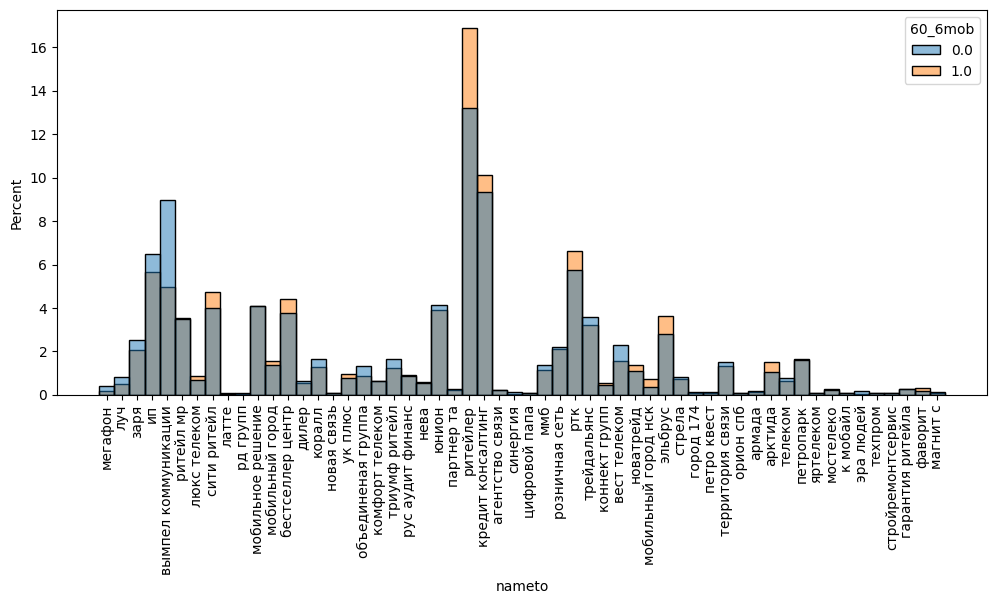

In [103]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=origin, x='nameto', hue='60_6mob', stat='percent', discrete=True, common_norm=False, ax=ax)
for i in ax.get_xticklabels():
    i.set_rotation(90)
plt.show()

### `sitename` - торговая точка (сайт)

In [72]:
def foo_sitename(x):
    
    gropup_sitename = [
        'tele2',                
        'maximus',               
        'beeline',               
        'mts',                   
        'интерком интерком',           
        'xiaomi',
        'реал связь',             
        'broker',                 
        'ноу хау',                
        'ип',                     
        'хорошая связь',          
        'cpoint',                 
        'скат',
        'strela',
    ]
    
    x = str(x).lower()

    if x.startswith("ooo"):
        x = x.replace("ooo", "")
    elif x.startswith("ооо"):
        x = x.replace("ооо", "")
    elif x.startswith("гк"):
        x = x.replace("гк", "")
    elif x.startswith("ип"):
        x = "ип"
    elif x.startswith("ip"):
        x = "ип"
    elif x.startswith("билайн"):
        x = "ип"
    elif "cpoint" in x:
        x = "cpoint"
    elif x.startswith("мегафон"):group_sitename
        x = "megafon"

    x = x.replace("www.", "")
    x = x.replace(".ru", "")
    x = x.replace(".com", "")
    x = re.sub("\W+", " ", x)
    x = x.strip()
    
    if x not in gropup_sitename:
        x = 'small_group'
    
    if x in ["nan", " null", "none", ""]:
        x = None

    return x

In [74]:
origin['sitename'].apply(foo_sitename).value_counts()

sitename
tele2                10689
maximus               4596
beeline               4593
mts                   1206
интерком интерком      496
small_group            375
xiaomi                 320
реал связь             317
broker                 295
ноу хау                292
ип                     271
хорошая связь          230
cpoint                 208
скат                   171
strela                 158
Name: count, dtype: int64

In [51]:
origin['sitename'].value_counts()

sitename
tele2                10689
www.maximus.ru        4596
www.beeline.ru        4586
www.mts.ru            1206
ИНТЕРКОМ ИНТЕРКОМ      496
                     ...  
Plus7                    1
www.egrad.ru             1
ООО Амур-Телеком         1
msphone.ru               1
ПЕРВЫЙ СОТОВЫЙ           1
Name: count, Length: 69, dtype: int64

In [5]:
for i in origin['sitename'].value_counts().items():
    print(i)

('tele2', 10689)
('www.maximus.ru', 4596)
('www.beeline.ru', 4586)
('www.mts.ru', 1206)
('ИНТЕРКОМ ИНТЕРКОМ', 496)
('Xiaomi', 319)
('Реал Связь', 317)
('broker', 295)
('Ноу Хау', 292)
('Хорошая связь', 230)
('CPOINT-IPHPA', 204)
('ООО Скат', 171)
('STRELA', 158)
('OOO Riteiler', 72)
('Тренд Телеком', 68)
('www.megafon.ru', 63)
('IP Rzianina Anna Sergeevna', 62)
('ИП Максимова Эльза Олеговна', 35)
('IP Lein Aleksei Vladimirovich', 31)
('ИП Кецбая Л.Б.', 28)
('Билайн ( ИП Краснокутский А.А.)', 27)
('ИП Воробьева Яна Евгеньевна', 25)
('ГК Твоя Территория', 20)
('www.domotekhnika.ru/', 15)
('www.cifrocity.com', 14)
('ИП Матанов Сергей Юрьевич', 12)
('На Связи', 12)
('OOO SOTAKOMPLIUS', 10)
('Вэллком Вэллком', 10)
('Ультроника Ультроника', 10)
('ИП Елкина Нина Сергеевна', 10)
('IP Ishhanian Gevork Karenovich', 8)
('ИП Дмитриева ЛМ', 8)
('OOO Konnekt', 8)
('Samsung', 8)
('IP Akulenko Oleg Sergeevich', 7)
('Cash.paylate.ru', 7)
('Beeline', 7)
('www.eldorado.ru', 7)
('Ультра Омск', 6)
('ИП Сид

In [52]:
SITENAMES = [
    'www.maximus.ru',
    'www.beeline.ru',
    'www.mts.ru',
    'www.megafon.ru',
    'www.domotekhnika.ru/',
    'tomatomobile.ru',
    'www.cifrocity.com',
    'Cash.paylate.ru',
    'www.eldorado.ru',
    'www.egrad.ru',
    'msphone.ru',
    'cash.paylate.ru',
    'www.plus7.ru/',
    'cash.paylate.ru',
    'www.egrad.ru',
]

In [53]:
def gen_is_site(x):

    return 1 if x in SITENAMES else 0

In [54]:
origin['sitename']

AppId
2109337    www.beeline.ru
2110492          ООО Скат
2106411    www.beeline.ru
2111660    www.beeline.ru
2110507    www.beeline.ru
                ...      
2095578    www.beeline.ru
2098268    www.beeline.ru
2098672    www.beeline.ru
2100290             tele2
2103977    www.beeline.ru
Name: sitename, Length: 24217, dtype: object

In [59]:
origin['is_site'] = origin['sitename'].apply(gen_is_site)

In [56]:
origin['sitename'] = origin['sitename'].astype(str)

In [61]:
def site_foo(x):
    x = x.lower()

    if x.startswith('ooo'):
        x = x.replace('ooo', '')
    elif x.startswith('ооо'):
        x = x.replace('ооо', '')
    elif x.startswith('гк'):
        x = x.replace('гк', '')

    elif x.startswith('ип'):
        x = 'ип'
    elif x.startswith('ip'):
        x = 'ип'
    elif x.startswith('билайн'):
        x = 'ип'

    elif 'cpoint' in x:
        x = 'cpoint'

    elif x.startswith('мегафон'):
        x = 'megafon'

    x = x.replace('www.', '')
    x = x.replace('.ru', '')
    x = x.replace('.com', '')
    x = re.sub('\W+', ' ', x)
    x = x.strip()
    
    return x

In [62]:
origin['sitename'] = origin['sitename'].apply(site_foo)

In [63]:
origin['sitename'].value_counts()

sitename
tele2                      10689
maximus                     4596
beeline                     4593
mts                         1206
интерком интерком            496
xiaomi                       320
реал связь                   317
broker                       295
ноу хау                      292
ип                           271
хорошая связь                230
cpoint                       208
скат                         171
strela                       158
riteiler                      72
тренд телеком                 68
megafon                       65
твоя территория               20
domotekhnika                  15
cifrocity                     14
на связи                      12
cash paylate                  11
ультроника ультроника         10
вэллком вэллком               10
sotakomplius                  10
konnekt                        8
samsung                        8
eldorado                       7
ультра омск                    6
diksis                         6
g

In [66]:
group_sitename = [
    'tele2',                
    'maximus',               
    'beeline',               
    'mts',                   
    'интерком интерком',           
    'xiaomi',
    'реал связь',             
    'broker',                 
    'ноу хау',                
    'ип',                     
    'хорошая связь',          
    'cpoint',                 
    'скат',
    'strela',                 
]

In [67]:
origin['sitename'].apply(lambda x: 'small_sample' if x not in group_sitename else x).value_counts()

sitename
tele2                10689
maximus               4596
beeline               4593
mts                   1206
интерком интерком      496
small_sample           375
xiaomi                 320
реал связь             317
broker                 295
ноу хау                292
ип                     271
хорошая связь          230
cpoint                 208
скат                   171
strela                 158
Name: count, dtype: int64

In [25]:
for idx in origin['sitename'].index:
    for i in group_sitename:
        if origin.loc[idx, 'sitename'] in group_sitename:
            origin.loc[idx, 'sitename'] = 'small_sample'

In [116]:
origin['sitename'] = origin['sitename'].replace('nan', np.nan)

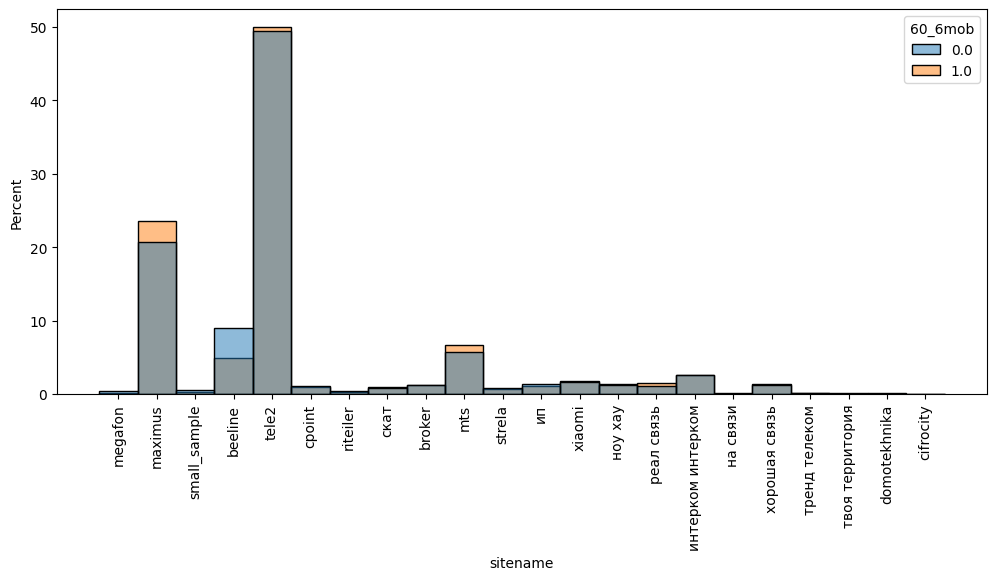

In [118]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=origin, x='sitename', hue='60_6mob', stat='percent', discrete=True, common_norm=False, ax=ax)
for i in ax.get_xticklabels():
    i.set_rotation(90)
plt.show()

### `idchannel` - канал привлечения

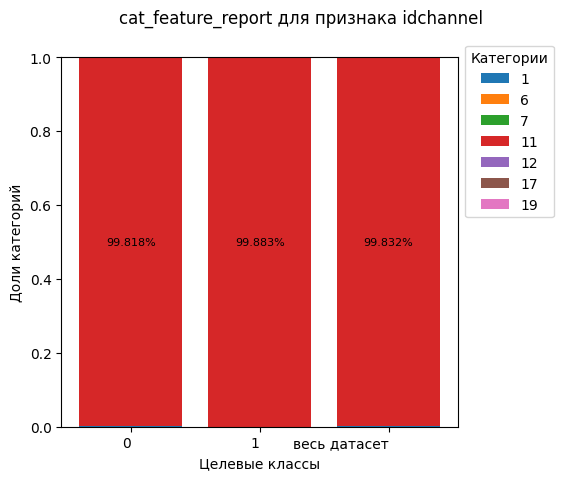

In [95]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='idchannel', target_colname='60_6mob')

In [96]:
origin.drop(columns='idchannel', inplace=True)

### `DOC` - тип документа

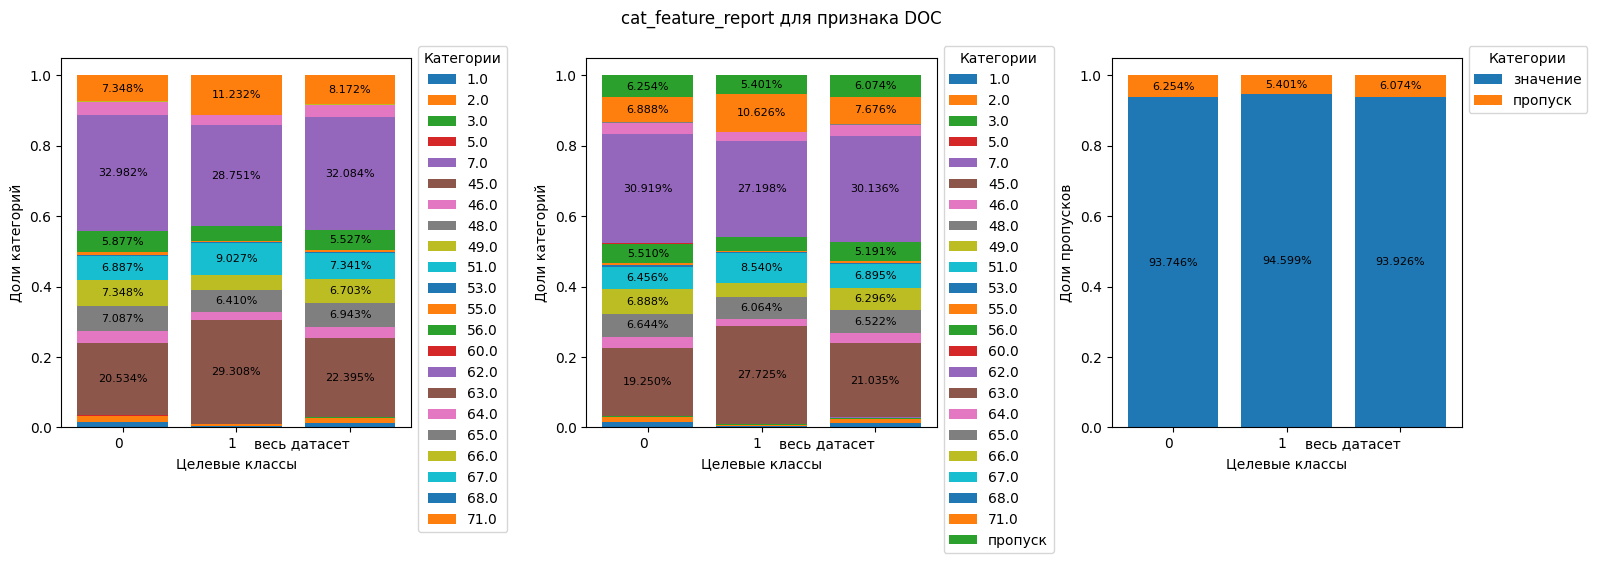

In [97]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='DOC', target_colname='60_6mob')

### `client_type` - тип клиента (0 - новый, 1 - повторный)

In [98]:
origin['client_type'].value_counts()

client_type
0    24350
Name: count, dtype: int64

In [99]:
origin = origin.drop(columns='client_type') # константная фича

### `educationid` - 

In [100]:
origin['educationid'].value_counts()

educationid
1003    24350
Name: count, dtype: int64

In [101]:
origin = origin.drop(columns='educationid') # константная фича

### `bankrupt` -  константная фича

In [102]:
origin['bankrupt'].value_counts()

bankrupt
False    24350
Name: count, dtype: int64

In [103]:
origin = origin.drop(columns='bankrupt') # константная фича

### `monthlycreditpayment` -  константная фича

In [104]:
origin['monthlycreditpayment'].value_counts() 

monthlycreditpayment
0    24350
Name: count, dtype: int64

In [105]:
origin = origin.drop(columns='monthlycreditpayment') # константная фича

### `Risk_cat`

In [114]:
origin['risk_cat'] = origin['risk_cat'].apply(lambda x: x.lower())

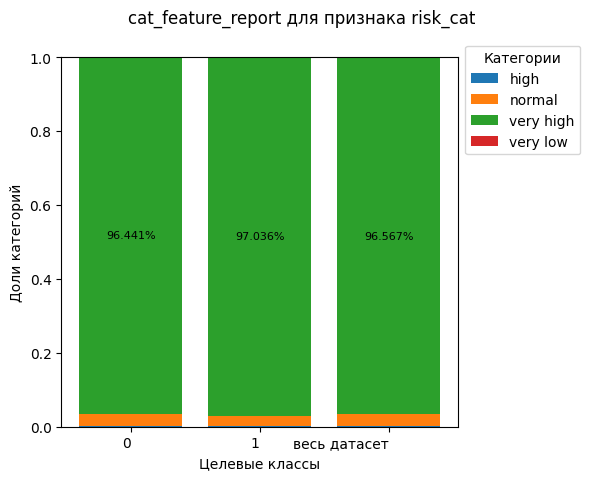

In [115]:
fig, axes = utils.eda.cat_feature_report(origin, feature_colname='risk_cat', target_colname='60_6mob')

In [121]:
origin.columns.to_list()

['dtstart',
 'CategoryGoodsId',
 'InitialFee',
 'sex',
 'citizenshipid',
 'domen',
 'martialid',
 'dependents',
 'typeemployerid',
 'CustomerReg',
 'nameto',
 'sitename',
 'DOC',
 'risk_cat',
 'averagemonthlyincome',
 'othercredits',
 'fullname',
 'position',
 'positionlevel',
 'CompanyTypeId',
 'OccupationAreaId',
 'EmploymentType',
 'creditperiod',
 'loan_amount',
 '30_2mob',
 '60_6mob',
 'age',
 'month',
 'day',
 'weekday',
 'seconds']

## Корреляции

In [122]:
corr_cols = [
    'day',
    'seconds',
    'age',
    'dependents',
    'averagemonthlyincome',
    'loan_amount',
    'InitialFee',
    'creditperiod',
    '60_6mob',
    '30_2mob',
]

In [123]:
origin_corr = origin[corr_cols]
# origin_corr = origin_corr.astype('float')

### Pearson

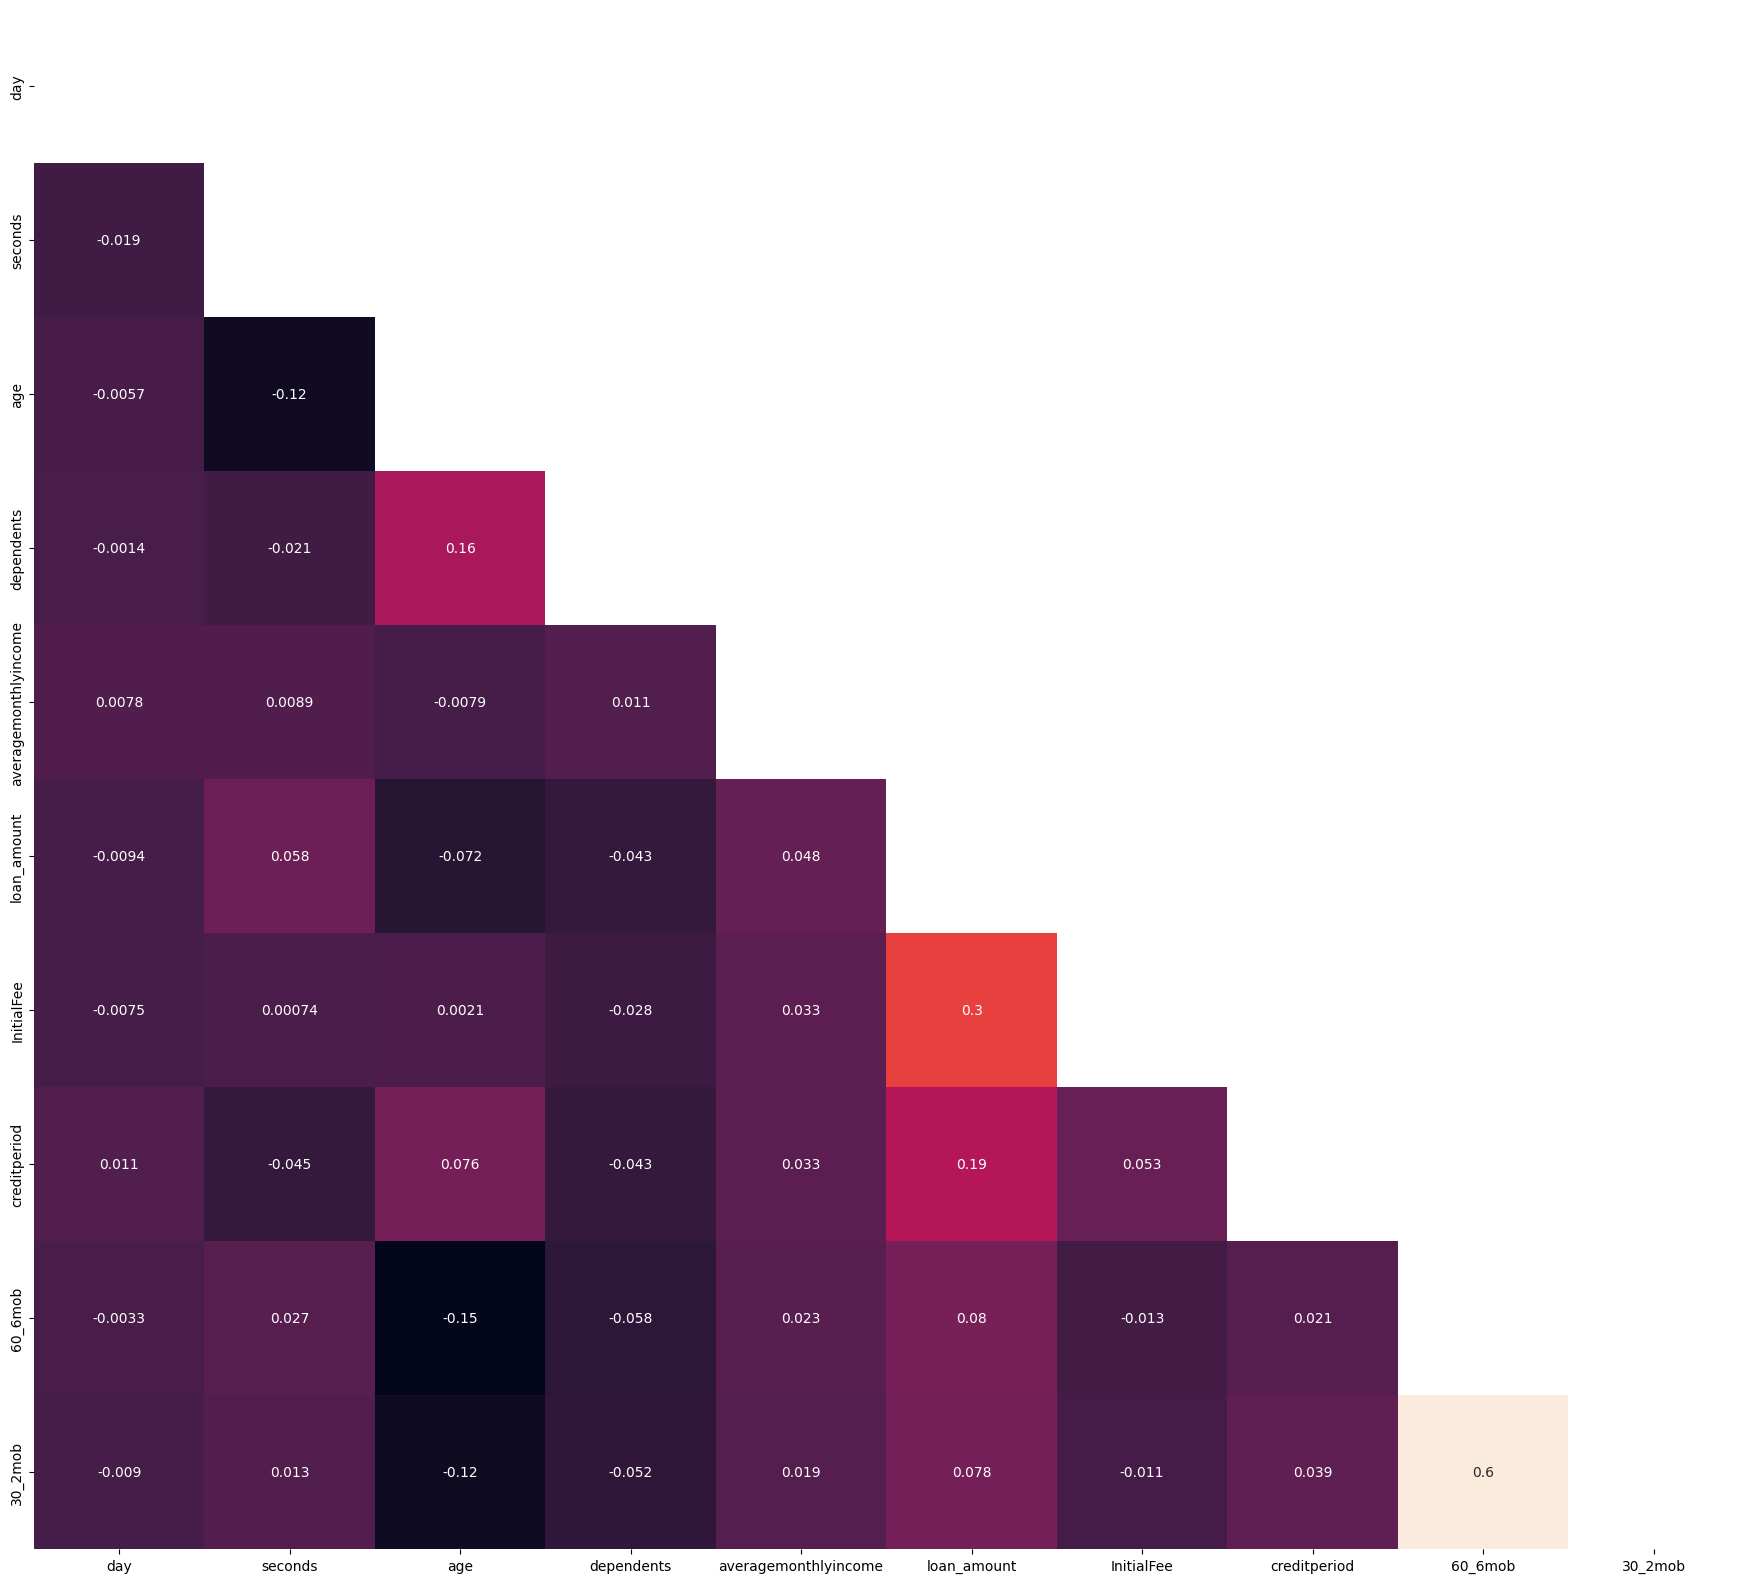

In [124]:
fig, ax = plt.subplots(figsize=(22, 20))
sns.heatmap(
    origin_corr.corr(method='pearson'),
    mask=np.triu(np.ones_like(origin_corr.corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()

### Spearman

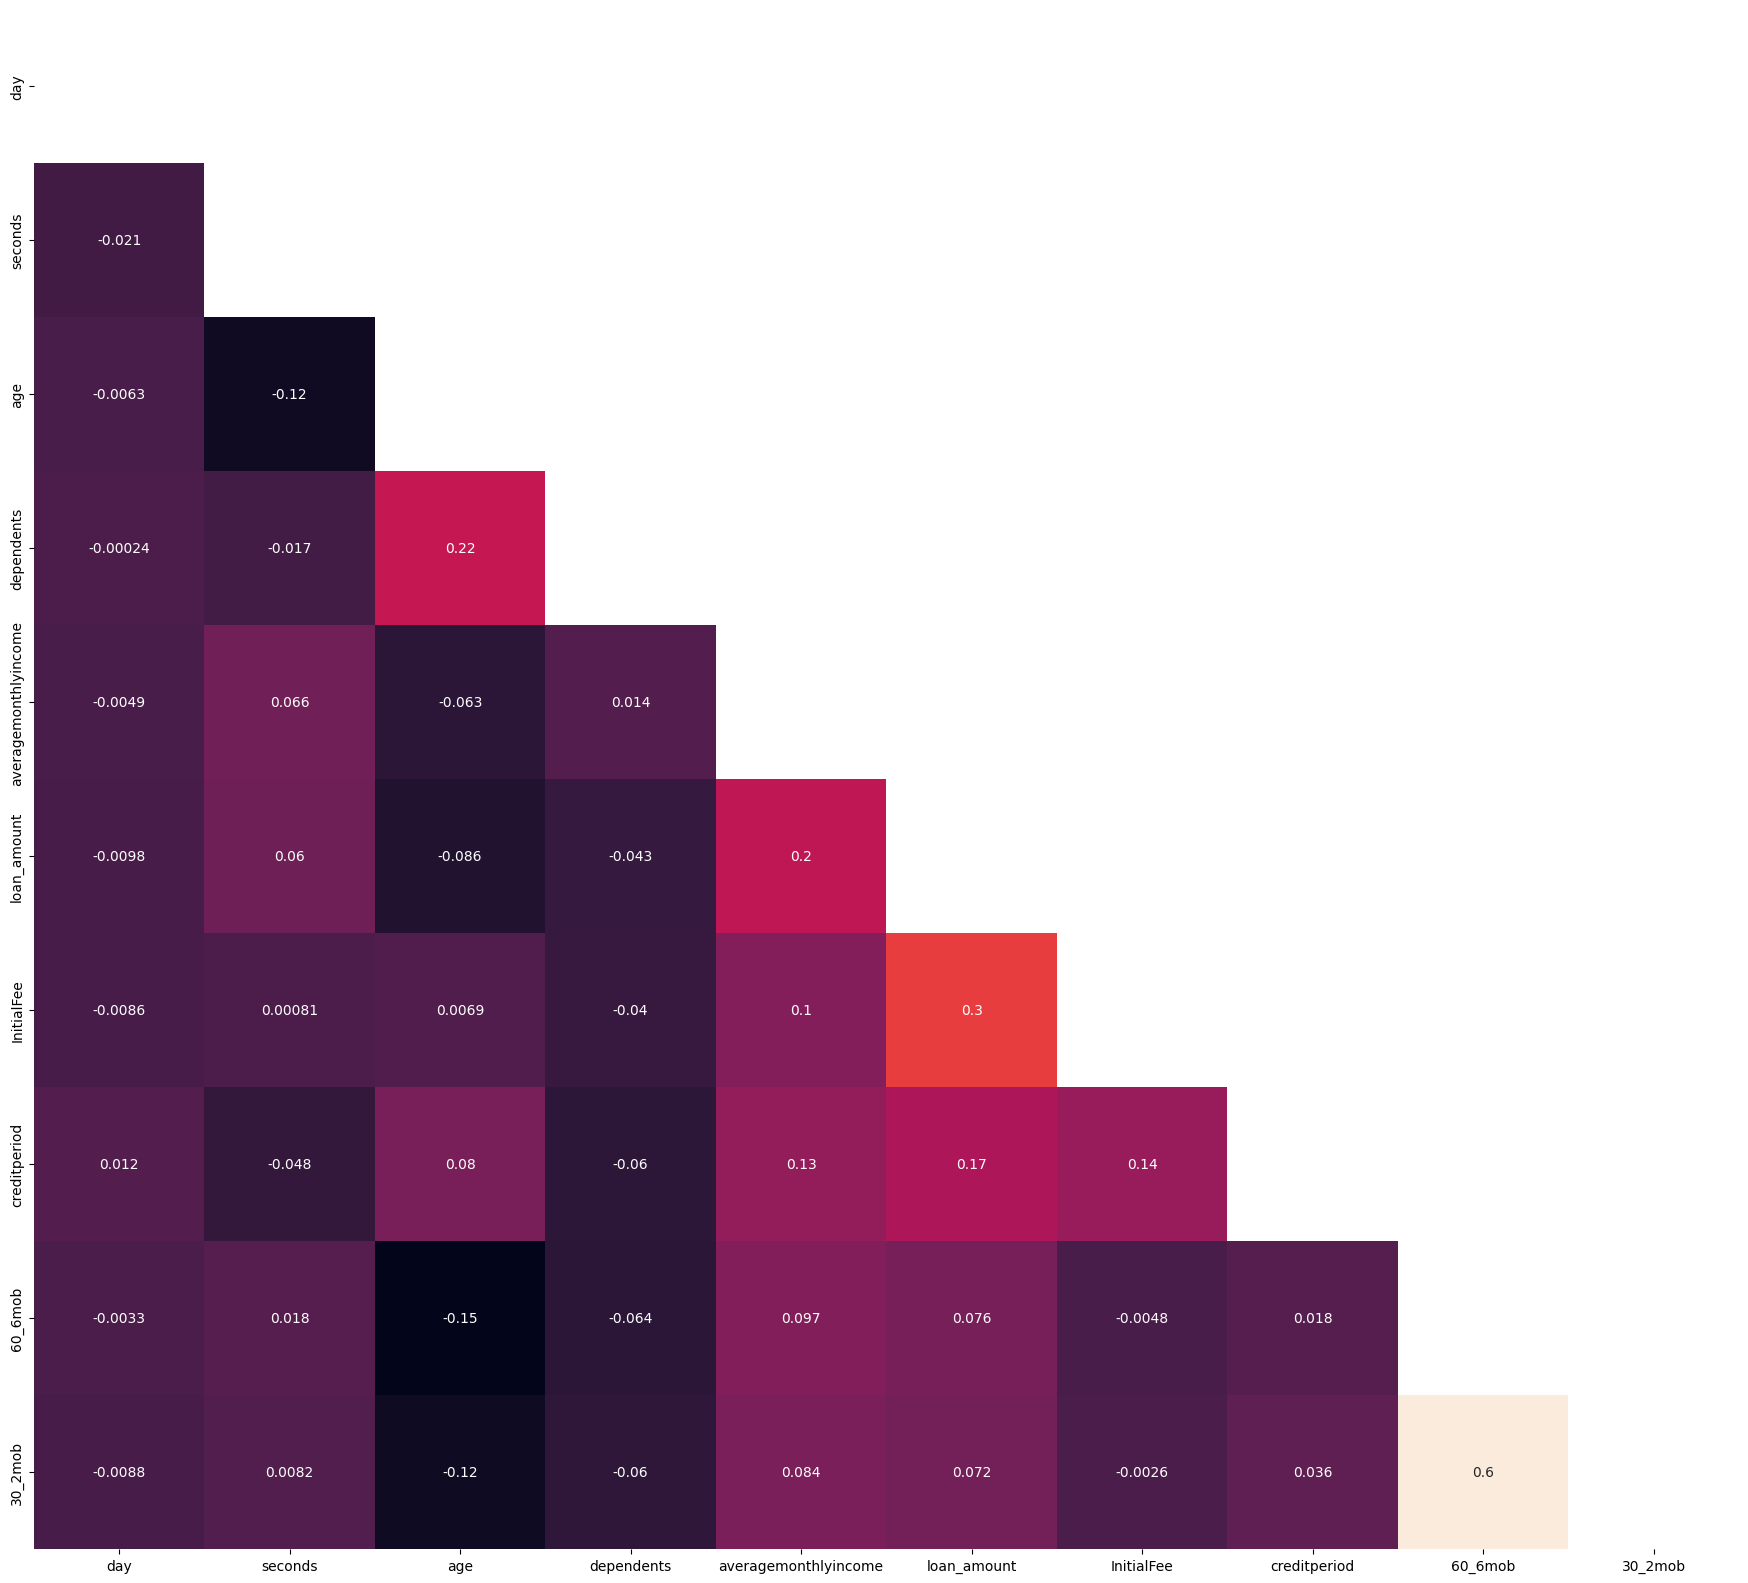

In [125]:
fig, ax = plt.subplots(figsize=(22, 20))
sns.heatmap(
    origin_corr.corr(method='spearman'),
    mask=np.triu(np.ones_like(origin_corr.corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()